# Predicting Deposits Subscribe by Telephonic Marketing

## Final Project - Kurnia Anwar Ra'if

#### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy import stats
import warnings
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
import sklearn.linear_model as linear_model
from matplotlib import pyplot
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

### A. Data Understanding

In [3]:
df_bank = pd.read_csv("F:/Bootcamp Data Science/Final Project/Banking Dataset - Marketing Targets Maybe using this dataset/bank.csv")
df_bank.rename(columns={'y': 'subscribed'} , inplace = True)
df_bank

age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married    unknown      no     1506     yes   no   
4       33        unknown   single    unknown      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may       261         1     -1         0  unknown   
1       unknown    5   may       151         1     -1         0  unknown   
2       unknown    5   may        76         1     -1         0  unknown   
3       unknown    5   may        92         1     -1         0  unknown   
4       unknown    5   may       198         1     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
49727  cellular   30   jul       329         5     -1         0  unknown   
49728   unknown    9   may       153         1     -1         0  unknown   
49729  cellular   19   aug       151        11     -1         0  unknown   
49730  cellular    6   feb       129         4    211         3    other   
49731  cellular    3   apr       345         2    249         7    other   

      subscribed  
0             no  
1             no  
2             no  
3             no  
4             no  
...          ...  
49727         no  
49728         no  
49729         no  
49730         no  
49731         no  

[49732 rows x 17 columns]

In [4]:
df_bank.sample(10)

age            job   marital  education default  balance housing loan  \
13730   28     technician  divorced  secondary      no      477     yes  yes   
6422    46    blue-collar   married    primary      no     -326     yes   no   
19584   31     technician   married  secondary      no     -556     yes   no   
8726    33       services   married  secondary      no       39     yes   no   
22275   36  self-employed   married    primary      no      161      no   no   
15002   37       services    single  secondary      no       43     yes   no   
45689   35       services   married  secondary      no     1453     yes   no   
32641   35       services   married  secondary      no      195     yes   no   
45709   38     technician    single  secondary      no      258      no  yes   
37740   46    blue-collar   married  secondary      no      431     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
13730  cellular   10   jul        93         1     -1         0  unknown   
6422    unknown   27   may        59         4     -1         0  unknown   
19584  cellular    7   aug       115         2     -1         0  unknown   
8726    unknown    4   jun        66         4     -1         0  unknown   
22275  cellular   21   aug       239         3     -1         0  unknown   
15002  cellular   17   jul        36         2     -1         0  unknown   
45689   unknown   28   may       199         1     -1         0  unknown   
32641  cellular   17   apr       203         1     -1         0  unknown   
45709   unknown   20   jun       587         2     -1         0  unknown   
37740  cellular   14   may       157         4    367         1  failure   

      subscribed  
13730         no  
6422          no  
19584         no  
8726          no  
22275         no  
15002         no  
45689         no  
32641         no  
45709         no  
37740         no

In [5]:
df_bank["subscribed"].value_counts()

no     43922
yes     5810
Name: subscribed, dtype: int64

In [6]:
#read train and test dataset
#df1 = pd.read_csv("F:/Bootcamp Data Science/Final Project/Banking Dataset - Marketing Targets Maybe using this dataset/train.csv", sep=';')
#df1

In [7]:
#df2 = pd.read_csv("F:/Bootcamp Data Science/Final Project/Banking Dataset - Marketing Targets Maybe using this dataset/test.csv" , sep=';' , engine='python')
#df2.rename(columns={'y': 'subscribed'} , inplace = True)
#df2.tail()

In [8]:

#Copy data bank
X = df_bank.copy()
#concat 2 datsets
#X = pd.concat([df1,df2])
#X = X.drop_duplicates()
#X.head()

train , test = train_test_split(X,test_size=0.2, random_state=1)

In [9]:
train

age          job   marital  education default  balance housing loan  \
823     33  blue-collar    single    primary      no       95     yes   no   
32895   38  blue-collar   married  secondary      no      194     yes   no   
31304   19      student    single  secondary      no     1803      no   no   
15594   25  blue-collar   married  secondary      no      895      no   no   
14670   45   management   married   tertiary      no        0      no  yes   
...    ...          ...       ...        ...     ...      ...     ...  ...   
43723   50   technician   married   tertiary      no     1830      no   no   
32511   34   management  divorced   tertiary      no      528     yes   no   
5192    48   management   married   tertiary      no     4191      no   no   
12172   45       admin.   married    unknown      no     1783      no   no   
33003   45  blue-collar   married    unknown      no      349     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
823     unknown    7   may       102         1     -1         0  unknown   
32895  cellular   17   apr       576         4    340         7  failure   
31304  cellular   10   mar        59         1     -1         0  unknown   
15594  cellular   21   jul       317         3     -1         0  unknown   
14670  cellular   15   jul       112         4     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
43723  cellular   14   may       318         3     -1         0  unknown   
32511  cellular   17   apr       233         2     -1         0  unknown   
5192    unknown   21   may       363         6     -1         0  unknown   
12172   unknown   20   jun        11        11     -1         0  unknown   
33003  cellular   17   apr       179         2    336         2    other   

      subscribed  
823           no  
32895         no  
31304         no  
15594         no  
14670         no  
...          ...  
43723         no  
32511         no  
5192          no  
12172         no  
33003         no  

[39785 rows x 17 columns]

In [10]:
test

age          job   marital  education default  balance housing loan  \
8165    24  blue-collar    single    primary      no      147     yes   no   
21927   32   technician   married  secondary      no       20      no   no   
9756    34    housemaid   married   tertiary      no     5011     yes   no   
14416   47   technician   married  secondary      no        0      no   no   
35457   48   management  divorced  secondary      no      122     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
2402    23       admin.    single  secondary      no      281     yes   no   
6976    51   technician  divorced  secondary      no        0     yes   no   
7235    51   management   married   tertiary      no        0     yes  yes   
16819   39  blue-collar   married  secondary      no      -66      no  yes   
12936   31   management    single   tertiary      no     1598     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
8165     unknown    2   jun       102         2     -1         0  unknown   
21927   cellular   20   aug       210         2     -1         0  unknown   
9756     unknown    9   jun       311         2     -1         0  unknown   
14416  telephone   14   jul        81         2     -1         0  unknown   
35457  telephone    7   may       325         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
2402     unknown   13   may       124         1     -1         0  unknown   
6976     unknown   28   may       463         2     -1         0  unknown   
7235     unknown   29   may       410         5     -1         0  unknown   
16819  telephone   24   jul       626         5     -1         0  unknown   
12936   cellular    7   jul        36        33     -1         0  unknown   

      subscribed  
8165          no  
21927         no  
9756          no  
14416         no  
35457         no  
...          ...  
2402          no  
6976          no  
7235          no  
16819         no  
12936         no  

[9947 rows x 17 columns]

In [11]:
X

age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married    unknown      no     1506     yes   no   
4       33        unknown   single    unknown      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may       261         1     -1         0  unknown   
1       unknown    5   may       151         1     -1         0  unknown   
2       unknown    5   may        76         1     -1         0  unknown   
3       unknown    5   may        92         1     -1         0  unknown   
4       unknown    5   may       198         1     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
49727  cellular   30   jul       329         5     -1         0  unknown   
49728   unknown    9   may       153         1     -1         0  unknown   
49729  cellular   19   aug       151        11     -1         0  unknown   
49730  cellular    6   feb       129         4    211         3    other   
49731  cellular    3   apr       345         2    249         7    other   

      subscribed  
0             no  
1             no  
2             no  
3             no  
4             no  
...          ...  
49727         no  
49728         no  
49729         no  
49730         no  
49731         no  

[49732 rows x 17 columns]

#### Identify numerical and categorical data

In [12]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   contact     49732 non-null  object
 9   day         49732 non-null  int64 
 10  month       49732 non-null  object
 11  duration    49732 non-null  int64 
 12  campaign    49732 non-null  int64 
 13  pdays       49732 non-null  int64 
 14  previous    49732 non-null  int64 
 15  poutcome    49732 non-null  object
 16  subscribed  49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


Based on the displayed result above
1. Categorical Data : the datatype of job, marital, education, default, housing, loan, contact, month, poutcome are object.

2. Numerical Data : Age, balance, day, duration, campaign, pdays, previous are int64, it means that they are numerical variables.

### Heatmap Correlation

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_bank.corr(),annot = True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_1264\419925588.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bank.corr(),annot = True)


<Axes: >

#### Pearson Correlation Coefficient
From the graph above, it seems like nothing highly correlated as most of the values is below 0.5. 1 means is correlated while 0 means no correlation. There is no correlation, no relationship between the independent variables.So, it is good practice to check it before selecting the variables into the regression model since is one of the steps to avoid overfitting. Correlation matrix: (0<=|c|<0.3: weak), (0.3<=|c|<0.7: moderate) & (0.7<=|c|<1: strong)

#### Exploratory Data Analysis : Categorical Data

In [14]:
def cat_data(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  ax=sns.catplot(x=title,kind='count', hue="subscribed", palette='viridis', data=df_bank)

In [39]:
def categorical_data(title):
    plt.figure(figsize=(17,8))
    g=sns.catplot(x=title,kind='count', hue="subscribed", palette='viridis', data=df_bank, order = df_bank[title].value_counts().index) #edit : data, hue
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + 0.02, 
            p.get_height() * 1.02, 
            '{0:.1f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

In [40]:
categorical_data("marital")
#marital_data = pd.crosstab(df_bank["marital"],df_bank["subscribed"])
#print(marital_data)

<Figure size 1700x800 with 0 Axes>

In [41]:
plt.figure(figsize=(13,7))
categorical_data("default")

<Figure size 1300x700 with 0 Axes>

<Figure size 1700x800 with 0 Axes>

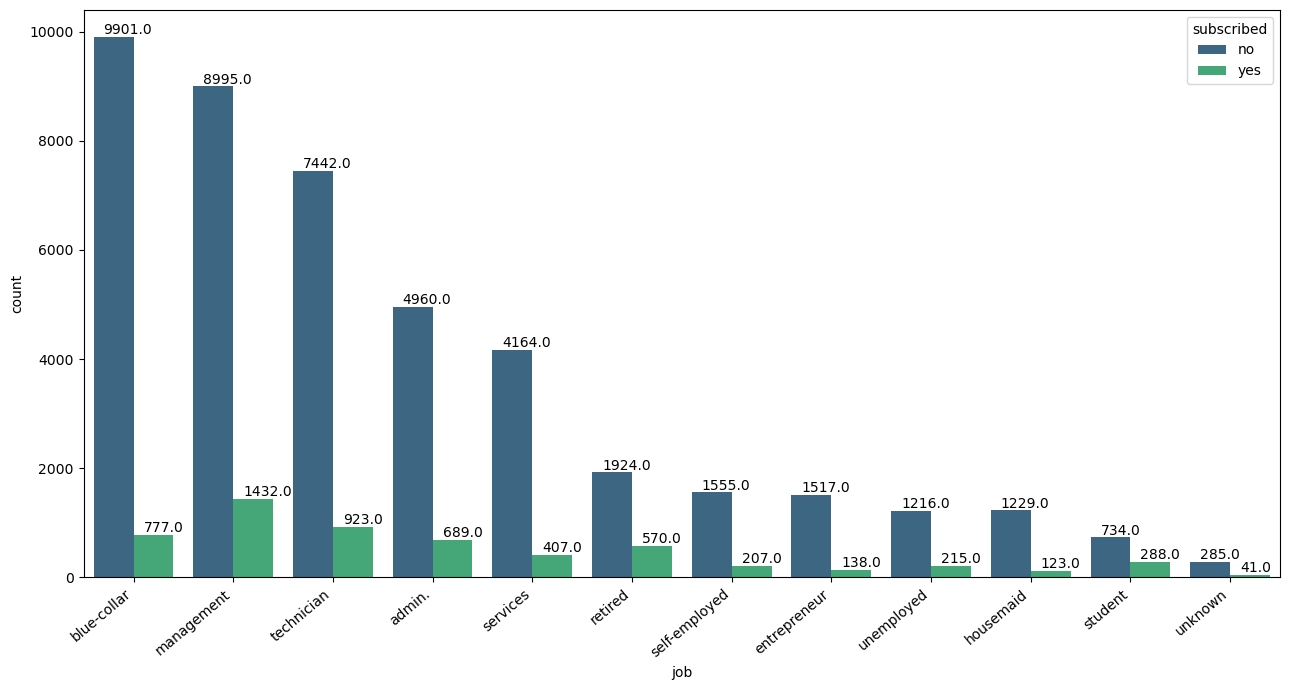

In [38]:
plt.figure(figsize=(13,7))
ax = sns.countplot(x='job', hue="subscribed", palette='viridis', data=df_bank, order = df_bank['job'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#Plus a label number count in each bar
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.tight_layout()
plt.show()

In [18]:
#pd.crosstab(Xtrain.loan.values,ytrain.values)

<Figure size 1224x576 with 0 Axes>

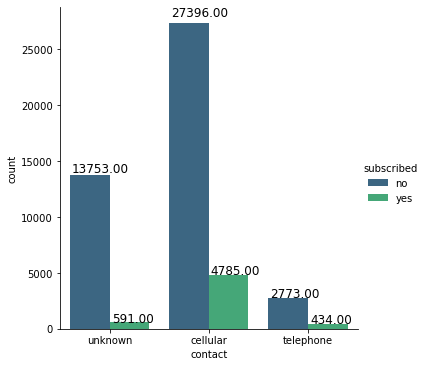

In [19]:
categorical_data("contact")
#loan_train = pd.crosstab(Xtrain.loan,ytrain)
#print(loan_train)

In [20]:
#Xtrain.loan.value_counts()

In [21]:
#ytrain.shape

In [22]:
categorical_data("loan")
#loan_train = pd.crosstab(Xtrain.loan,ytrain)
#print(loan_train)

<Figure size 1224x576 with 0 Axes>

In [23]:
cat_data("month")
#loan_train = pd.crosstab(Xtrain.loan,ytrain)
#print(loan_train)

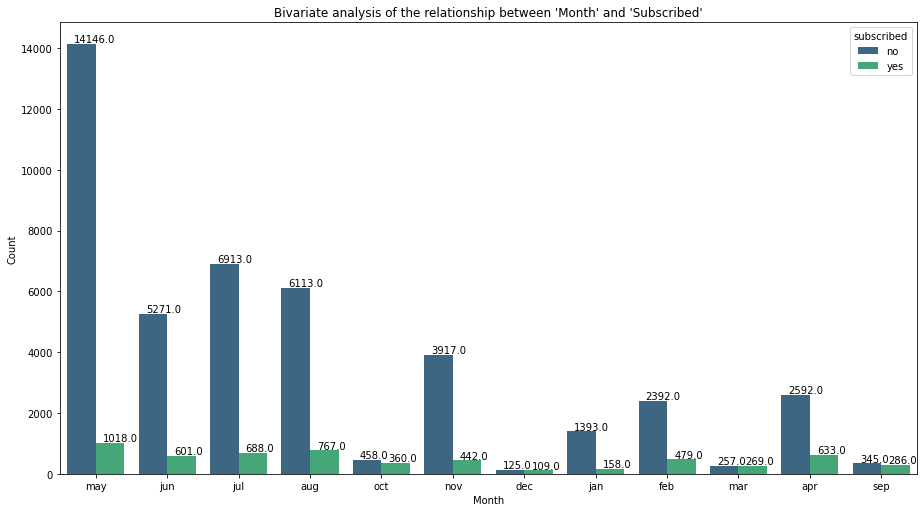

In [24]:
plt.figure(figsize=(13,7))
ax = sns.countplot(x='month', hue="subscribed", palette='viridis', data=df_bank)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#Plus a label number count in each bar
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.tight_layout()
plt.title("Bivariate analysis of the relationship between 'Month' and 'Subscribed'")
plt.ylabel("Count")
plt.xlabel("Month")
plt.show()

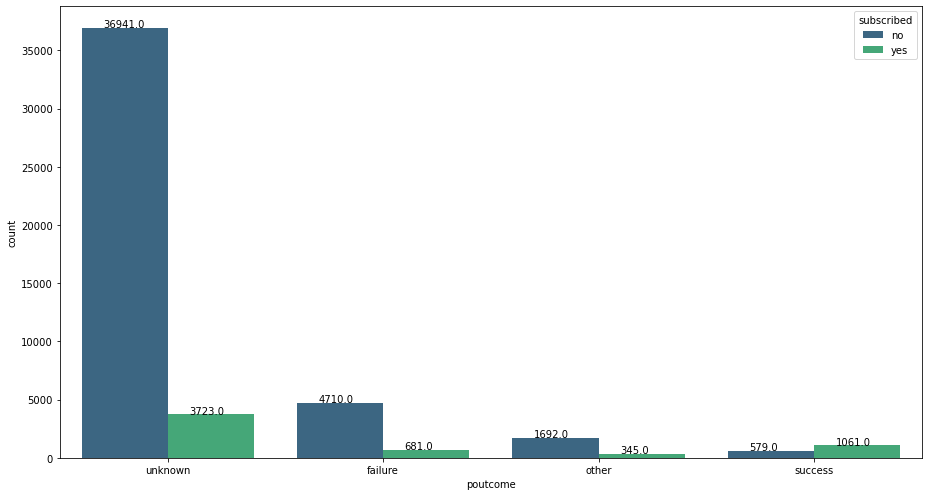

In [25]:
plt.figure(figsize=(13,7))
ax = sns.countplot(x='poutcome', hue="subscribed", palette='viridis', data=df_bank)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#Plus a label number count in each bar
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.tight_layout()
plt.show()

#### Exploratory Data Analysis : Numerical Data

In [26]:
# desciptive analysis for numerical columns
df_bank.describe()

age        balance           day      duration      campaign  \
count  49732.000000   49732.000000  49732.000000  49732.000000  49732.000000   
mean      40.957472    1367.761562     15.816315    258.690179      2.766549   
std       10.615008    3041.608766      8.315680    257.743149      3.099075   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    320.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  49732.000000  49732.000000  
mean      40.158630      0.576892  
std      100.127123      2.254838  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [27]:
def dist_bivariate(title):
  #train = pd.concat([Xtrain,ytrain],axis=1)
  sns.FacetGrid(df_bank,hue='subscribed',palette='cubehelix',size=5 ).map(sns.distplot,title).add_legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


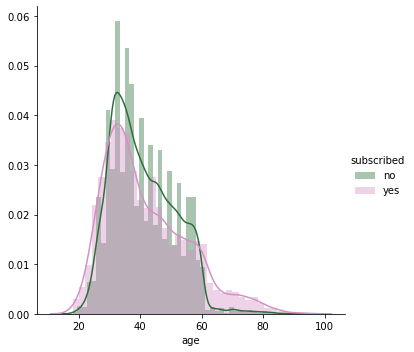

In [28]:
dist_bivariate('age')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


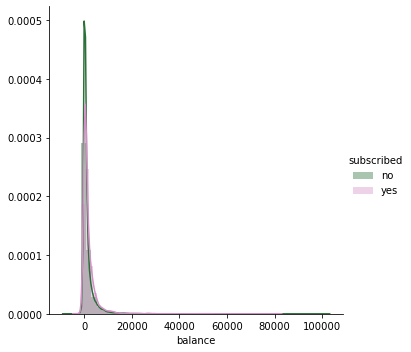

In [29]:
dist_bivariate('balance')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


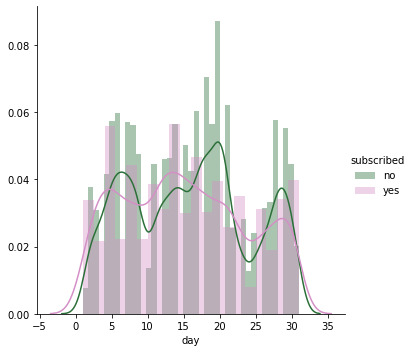

In [30]:
dist_bivariate("day")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


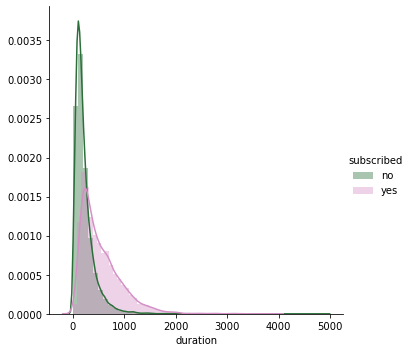

In [31]:
dist_bivariate("duration")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


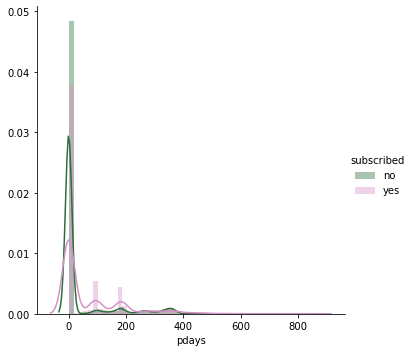

In [32]:
dist_bivariate('pdays')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


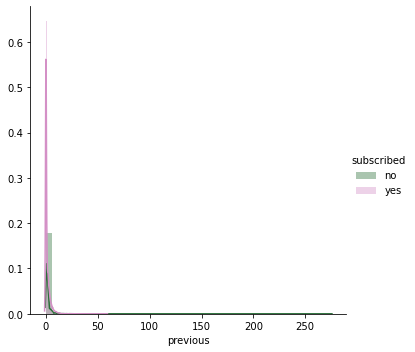

In [33]:
dist_bivariate("previous")

### B. Data Preparation : Data Train
1. Drop Duplicated Data
2. Outliers Analysis
3. Missing Value Handling
4. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data

##### 1. Drop Duplicated Data

In [34]:
# Detect duplicate data
train[train.duplicated(keep=False)]

age         job   marital  education default  balance housing loan  \
37266   36  technician   married  secondary      no       55     yes   no   
18403   58     retired  divorced    primary      no     2538     yes   no   
40391   45  management   married   tertiary      no     1529      no   no   
47830   49    services   married  secondary      no      823      no   no   
48540   34  management  divorced   tertiary      no    13204     yes  yes   
...    ...         ...       ...        ...     ...      ...     ...  ...   
45571   36  management    single   tertiary      no      339      no   no   
46467   55    services  divorced  secondary      no      218     yes   no   
47560   25  technician    single  secondary      no      -80     yes  yes   
45413   35  technician    single   tertiary      no     2658     yes   no   
49100   47  management    single   tertiary      no     4402      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
37266   cellular   13   may        38         2    369         4  failure   
18403   cellular   31   jul       307         6     -1         0  unknown   
40391   cellular   30   jun       160         1     -1         0  unknown   
47830   cellular    8   aug       780         4     -1         0  unknown   
48540   cellular   20   nov       197         2     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45571   cellular   21   nov         6         6     -1         0  unknown   
46467    unknown   29   may       200         2     -1         0  unknown   
47560    unknown    3   jun        89         1     -1         0  unknown   
45413   cellular   19   aug       768         2    141         3  failure   
49100  telephone   10   dec       805         1    190         1    other   

      subscribed  
37266         no  
18403         no  
40391         no  
47830        yes  
48540         no  
...          ...  
45571         no  
46467         no  
47560         no  
45413        yes  
49100        yes  

[5780 rows x 17 columns]

In [35]:
print("Before drop duplicated data")
train.shape

Before drop duplicated data


(39785, 17)

In [36]:
train = train.drop_duplicates(keep='first')

In [37]:
print("After drop duplicated data")
train.shape

After drop duplicated data


(36895, 17)

In [38]:
#Check again for duplicated data
train[train.duplicated(keep=False)]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, subscribed]
Index: []

There are not duplicated rows again after drop duplicated.

##### 2. Outliers Analysis

##### Removing Outliers
Using IQR because from numerical data, the distribution data is not normal distribution

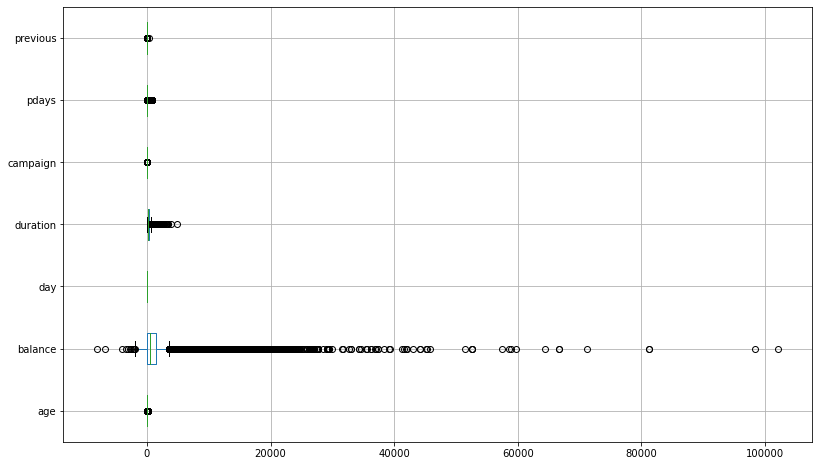

In [39]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

##### remove outliers : previous column

In [40]:
train.shape

(36895, 17)

In [41]:
Q1 = train["previous"].quantile(0.25)
Q3 = train["previous"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [42]:
train = train[(train["previous"] >= low_limit) &
                        (train["previous"] <= high_limit)
                        ]

In [43]:
train.shape

(30090, 17)

##### remove outliers : pdays column

In [44]:
train.shape

(30090, 17)

In [45]:
Q1 = train["pdays"].quantile(0.25)
Q3 = train["pdays"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [46]:
train = train[(train["pdays"] >= low_limit) &
                        (train["pdays"] <= high_limit)
                        ]

In [47]:
train.shape

(30090, 17)

##### remove outliers : campaign column

In [48]:
train.shape

(30090, 17)

In [49]:
Q1 = train["campaign"].quantile(0.25)
Q3 = train["campaign"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [50]:
train = train[(train["campaign"] >= low_limit) &
                        (train["campaign"] <= high_limit)
                        ]

In [51]:
train.shape

(27788, 17)

##### remove outliers : duration column

In [52]:
train.shape

(27788, 17)

In [53]:
Q1 = train["duration"].quantile(0.25)
Q3 = train["duration"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [54]:
train = train[(train["duration"] >= low_limit) &
                        (train["duration"] <= high_limit)
                        ]

In [55]:
train.shape

(25709, 17)

##### remove outliers :  day column

In [56]:
train.shape

(25709, 17)

In [57]:
Q1 = train["day"].quantile(0.25)
Q3 = train["day"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [58]:
train = train[(train["day"] >= low_limit) &
                        (train["day"] <= high_limit)
                        ]

In [59]:
train.shape

(25709, 17)

##### remove outliers : balance column

In [60]:
train.shape

(25709, 17)

In [61]:
Q1 = train["balance"].quantile(0.25)
Q3 = train["balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [62]:
train = train[(train["balance"] >= low_limit) &
                        (train["balance"] <= high_limit)
                        ]

In [63]:
train.shape

(22955, 17)

##### remove outliers : age column

In [64]:
train.shape

(22955, 17)

In [65]:
Q1 = train["age"].quantile(0.25)
Q3 = train["age"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [66]:
train = train[(train["age"] >= low_limit) &
                        (train["age"] <= high_limit)
                        ]

In [67]:
train.shape

(22822, 17)

#### Now there are no outliers in train Data

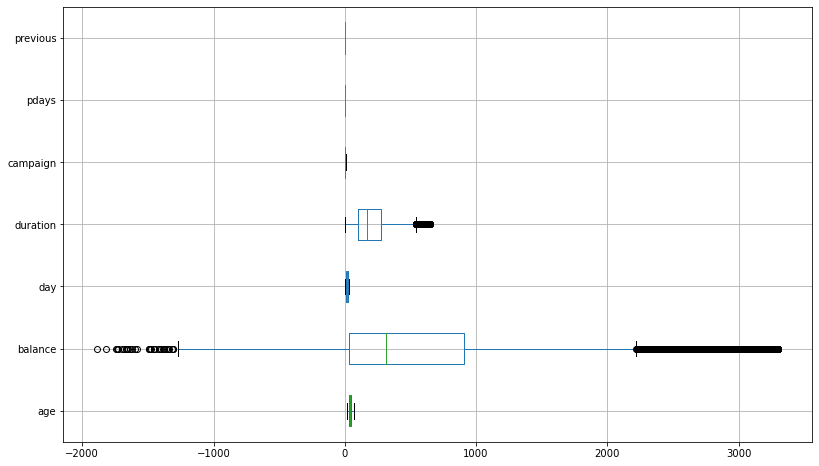

In [68]:
# Outlier Analysis checking again

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

##### 3. Missing Value Handling

In [69]:
train

age          job   marital  education default  balance housing loan  \
823     33  blue-collar    single    primary      no       95     yes   no   
31304   19      student    single  secondary      no     1803      no   no   
15594   25  blue-collar   married  secondary      no      895      no   no   
14670   45   management   married   tertiary      no        0      no  yes   
26345   32  blue-collar  divorced  secondary      no      658      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
7751    36  blue-collar   married  secondary      no      740     yes   no   
20609   30   management    single   tertiary      no       67      no   no   
7813    36   management    single   tertiary      no     2806     yes   no   
43723   50   technician   married   tertiary      no     1830      no   no   
32511   34   management  divorced   tertiary      no      528     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
823     unknown    7   may       102         1     -1         0  unknown   
31304  cellular   10   mar        59         1     -1         0  unknown   
15594  cellular   21   jul       317         3     -1         0  unknown   
14670  cellular   15   jul       112         4     -1         0  unknown   
26345  cellular   20   nov       173         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
7751    unknown   30   may       171         2     -1         0  unknown   
20609  cellular   12   aug       578         4     -1         0  unknown   
7813    unknown   30   may       358         4     -1         0  unknown   
43723  cellular   14   may       318         3     -1         0  unknown   
32511  cellular   17   apr       233         2     -1         0  unknown   

      subscribed  
823           no  
31304         no  
15594         no  
14670         no  
26345         no  
...          ...  
7751          no  
20609         no  
7813          no  
43723         no  
32511         no  

[22822 rows x 17 columns]

In [70]:
train.sample(7)

age            job  marital  education default  balance housing loan  \
7070    26    blue-collar  married  secondary      no      245     yes   no   
15498   29       services  married  secondary      no      480     yes   no   
28247   26     unemployed  married    primary      no      205      no   no   
44914   43    blue-collar  married  secondary      no      625     yes   no   
10077   53  self-employed  married   tertiary      no     1128      no   no   
12421   49         admin.  married  secondary      no       12      no   no   
1756    30     technician   single  secondary      no       23     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
7070    unknown   28   may       146         2     -1         0  unknown   
15498  cellular   18   jul        89         2     -1         0  unknown   
28247  cellular   29   jan       239         1     -1         0  unknown   
44914   unknown   30   sep       175         1     -1         0  unknown   
10077   unknown   11   jun        29         1     -1         0  unknown   
12421   unknown   30   jun       217         2     -1         0  unknown   
1756    unknown    9   may       137         1     -1         0  unknown   

      subscribed  
7070          no  
15498         no  
28247         no  
44914         no  
10077         no  
12421         no  
1756          no

#### Missing Value Check each rows

In [71]:
train['n_missing'] = train.isnull().sum(axis=1)

In [72]:
train.sort_values('n_missing',ascending=False)

age            job   marital  education default  balance housing loan  \
823     33    blue-collar    single    primary      no       95     yes   no   
48178   46    blue-collar  divorced    primary      no     1712      no   no   
19040   52         admin.   married    primary      no      813      no  yes   
9856    59    blue-collar  divorced    primary      no     1320      no   no   
26996   30       services    single  secondary      no       62     yes   no   
...    ...            ...       ...        ...     ...      ...     ...  ...   
8976    50     unemployed   married    primary      no      705      no   no   
42675   50         admin.   married  secondary      no     2955      no   no   
6185    33    blue-collar   married    primary      no     1217     yes   no   
17605   42  self-employed   married  secondary      no     2130     yes  yes   
32511   34     management  divorced   tertiary      no      528     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
823     unknown    7   may       102         1     -1         0  unknown   
48178   unknown   19   jun       110         1     -1         0  unknown   
19040  cellular    5   aug       113         2     -1         0  unknown   
9856    unknown    9   jun       522         1     -1         0  unknown   
26996  cellular   21   nov        76         1     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
8976    unknown    5   jun       504         1     -1         0  unknown   
42675  cellular   14   jan       166         1     -1         0  unknown   
6185    unknown   27   may       271         3     -1         0  unknown   
17605  cellular   29   jul       146         2     -1         0  unknown   
32511  cellular   17   apr       233         2     -1         0  unknown   

      subscribed  n_missing  
823           no          0  
48178         no          0  
19040         no          0  
9856          no          0  
26996         no          0  
...          ...        ...  
8976         yes          0  
42675         no          0  
6185          no          0  
17605         no          0  
32511         no          0  

[22822 rows x 18 columns]

In [73]:
train.drop('n_missing', axis=1, inplace=True)

In [74]:
train

age          job   marital  education default  balance housing loan  \
823     33  blue-collar    single    primary      no       95     yes   no   
31304   19      student    single  secondary      no     1803      no   no   
15594   25  blue-collar   married  secondary      no      895      no   no   
14670   45   management   married   tertiary      no        0      no  yes   
26345   32  blue-collar  divorced  secondary      no      658      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
7751    36  blue-collar   married  secondary      no      740     yes   no   
20609   30   management    single   tertiary      no       67      no   no   
7813    36   management    single   tertiary      no     2806     yes   no   
43723   50   technician   married   tertiary      no     1830      no   no   
32511   34   management  divorced   tertiary      no      528     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
823     unknown    7   may       102         1     -1         0  unknown   
31304  cellular   10   mar        59         1     -1         0  unknown   
15594  cellular   21   jul       317         3     -1         0  unknown   
14670  cellular   15   jul       112         4     -1         0  unknown   
26345  cellular   20   nov       173         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
7751    unknown   30   may       171         2     -1         0  unknown   
20609  cellular   12   aug       578         4     -1         0  unknown   
7813    unknown   30   may       358         4     -1         0  unknown   
43723  cellular   14   may       318         3     -1         0  unknown   
32511  cellular   17   apr       233         2     -1         0  unknown   

      subscribed  
823           no  
31304         no  
15594         no  
14670         no  
26345         no  
...          ...  
7751          no  
20609         no  
7813          no  
43723         no  
32511         no  

[22822 rows x 17 columns]

#### Missing Value check each columns

In [75]:
train.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [76]:
train.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

#### Missing value check NaN

In [77]:
train.isnull().sum().sum()

0

In [78]:
train.isnull().any().any()

False

In [79]:
count_nan = train.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [80]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= age =================


32    1057
31    1029
33     995
35     968
34     953
36     925
30     904
37     833
39     732
38     710
40     681
41     669
42     648
29     627
45     617
46     612
44     598
43     577
47     559
28     558
49     545
48     509
51     501
27     495
52     494
50     491
26     437
53     437
57     408
56     404
54     400
55     395
59     380
58     359
25     303
60     270
24     162
23     103
22      71
61      61
21      51
63      34
64      30
20      26
66      25
62      23
65      22
70      22
67      20
71      19
69      19
72      18
19      17
68      10
18       9
Name: age, dtype: int64


============= job =================


blue-collar      5114
management       4532
technician       3871
admin.           2624
services         2262
retired           964
entrepreneur      793
self-employed     775
unemployed        665
housemaid         649
student           433
unknown           140
Name: job, dtype: int64


============= marital =================


married     13653
single       6458
divorced     2711
Name: marital, dtype: int64


============= education =================


secondary    12099
tertiary      6283
primary       3567
unknown        873
Name: education, dtype: int64


============= default =================


no     22308
yes      514
Name: default, dtype: int64


============= balance =================


 0       2087
 1        123
 4         83
 2         82
 3         78
         ... 
 1556       1
-651        1
-692        1
-1164       1
 2971       1
Name: balance, Length: 3707, dtype: int64


============= housing =================


yes    12639
no     10183
Name: housing, dtype: int64


============= loan =================


no     18815
yes     4007
Name: loan, dtype: int64


============= contact =================


cellular     13436
unknown       8186
telephone     1200
Name: contact, dtype: int64


============= day =================


20    1287
18    1086
6     1054
8     1033
5     1018
7      999
21     982
14     958
28     945
17     937
9      916
29     911
19     873
30     780
12     769
15     752
16     714
13     708
11     700
4      690
2      623
27     601
26     561
23     541
3      517
22     502
25     430
10     276
31     275
24     251
1      133
Name: day, dtype: int64


============= month =================


may    7434
jul    4124
aug    3290
jun    2933
nov    1575
apr    1129
feb    1108
jan     619
oct     211
mar     175
sep     161
dec      63
Name: month, dtype: int64


============= duration =================


123    106
104    106
90     105
121    104
112    103
      ... 
598      2
0        2
586      2
596      2
639      2
Name: duration, Length: 646, dtype: int64


============= campaign =================


1    9085
2    6849
3    2989
4    2090
5    1038
6     771
Name: campaign, dtype: int64


============= pdays =================


-1    22822
Name: pdays, dtype: int64


============= previous =================


0    22822
Name: previous, dtype: int64


============= poutcome =================


unknown    22822
Name: poutcome, dtype: int64


============= subscribed =================


no     21514
yes     1308
Name: subscribed, dtype: int64

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- Job: unknown
- Education: unknown
- Contact: unknown
- poutcome : unknown

balance: average yearly balance, if the value is negative because banks charge fees when this happens. And your bank could close your account if it stays negative for too long.
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values. Should we drop that column? Or should we impute the missing value?

First, we have to see what's the percentage of missing value in that column. If it contained a lot of missing value (let say >35%), then we can just drop that column. If not, then we can do some imputation.

##### Check percentage of missing value in each column selection

In [81]:
100 * len(train[train['job'].isin(['unknown'])]) / len(train)

0.6134431688721409

In [82]:
100 * len(train[train['education'].isin(['unknown'])]) / len(train)

3.8252563316098502

In [83]:
100 * len(train[train['contact'].isin(['unknown'])]) / len(train)

35.86889843133818

In [84]:
100 * len(train[train['poutcome'].isin(['unknown'])]) / len(train)

100.0

so there are 2 columns that have missing value >35%, they are `contact` and `poutcome`. But, for me contact column is important to analyze because of in this dataset, the marketing target way is only using celullar and telephone so we mustn't to drop it since the % missing value near 35%. So, we just drop `poutcome` column. I hope it's wise choice to imputing another column with unknown value.

In [85]:
train = train.drop(columns=['poutcome'])
train.sample(5)

age         job  marital  education default  balance housing loan  \
8243    33    services   single  secondary      no      245     yes   no   
346     45  technician  married  secondary      no       44     yes   no   
35852   42  management  married   tertiary      no       -1     yes  yes   
20189   31  management   single   tertiary      no       15      no   no   
34315   49  unemployed  married  secondary      no      207      no   no   

         contact  day month  duration  campaign  pdays  previous subscribed  
8243     unknown    2   jun       140         3     -1         0         no  
346      unknown    5   may        95         4     -1         0         no  
35852  telephone    8   may       185         1     -1         0         no  
20189   cellular   11   aug       119         2     -1         0         no  
34315  telephone    4   may       181         2     -1         0         no

##### imputation data for : job, education, contact columns

In [86]:
# Mode imputation on job column

mode_job = train[~train['job'].isin(['unknown'])]['job'].mode()[0]

train['job'] = train['job'].apply(lambda x: mode_job if x in ['unknown'] else x)

In [87]:
mode_job

'blue-collar'

In [88]:
train['job'].value_counts()

blue-collar      5254
management       4532
technician       3871
admin.           2624
services         2262
retired           964
entrepreneur      793
self-employed     775
unemployed        665
housemaid         649
student           433
Name: job, dtype: int64

In [89]:
# Mode imputation on education column

mode_education = train[~train['education'].isin(['unknown'])]['education'].mode()[0]

train['education'] = train['education'].apply(lambda x: mode_education if x in ['unknown'] else x)

In [90]:
mode_education

'secondary'

In [91]:
train['education'].value_counts()

secondary    12972
tertiary      6283
primary       3567
Name: education, dtype: int64

In [92]:
# Mode imputation on contact column

mode_contact = train[~train['contact'].isin(['unknown'])]['contact'].mode()[0]

train['contact'] = train['contact'].apply(lambda x: mode_contact if x in ['unknown'] else x)

In [93]:
mode_contact

'cellular'

In [94]:
train['contact'].value_counts()

cellular     21622
telephone     1200
Name: contact, dtype: int64

#### Check again for each columns

In [95]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= age =================


32    1057
31    1029
33     995
35     968
34     953
36     925
30     904
37     833
39     732
38     710
40     681
41     669
42     648
29     627
45     617
46     612
44     598
43     577
47     559
28     558
49     545
48     509
51     501
27     495
52     494
50     491
26     437
53     437
57     408
56     404
54     400
55     395
59     380
58     359
25     303
60     270
24     162
23     103
22      71
61      61
21      51
63      34
64      30
20      26
66      25
62      23
65      22
70      22
67      20
71      19
69      19
72      18
19      17
68      10
18       9
Name: age, dtype: int64


============= job =================


blue-collar      5254
management       4532
technician       3871
admin.           2624
services         2262
retired           964
entrepreneur      793
self-employed     775
unemployed        665
housemaid         649
student           433
Name: job, dtype: int64


============= marital =================


married     13653
single       6458
divorced     2711
Name: marital, dtype: int64


============= education =================


secondary    12972
tertiary      6283
primary       3567
Name: education, dtype: int64


============= default =================


no     22308
yes      514
Name: default, dtype: int64


============= balance =================


 0       2087
 1        123
 4         83
 2         82
 3         78
         ... 
 1556       1
-651        1
-692        1
-1164       1
 2971       1
Name: balance, Length: 3707, dtype: int64


============= housing =================


yes    12639
no     10183
Name: housing, dtype: int64


============= loan =================


no     18815
yes     4007
Name: loan, dtype: int64


============= contact =================


cellular     21622
telephone     1200
Name: contact, dtype: int64


============= day =================


20    1287
18    1086
6     1054
8     1033
5     1018
7      999
21     982
14     958
28     945
17     937
9      916
29     911
19     873
30     780
12     769
15     752
16     714
13     708
11     700
4      690
2      623
27     601
26     561
23     541
3      517
22     502
25     430
10     276
31     275
24     251
1      133
Name: day, dtype: int64


============= month =================


may    7434
jul    4124
aug    3290
jun    2933
nov    1575
apr    1129
feb    1108
jan     619
oct     211
mar     175
sep     161
dec      63
Name: month, dtype: int64


============= duration =================


123    106
104    106
90     105
121    104
112    103
      ... 
598      2
0        2
586      2
596      2
639      2
Name: duration, Length: 646, dtype: int64


============= campaign =================


1    9085
2    6849
3    2989
4    2090
5    1038
6     771
Name: campaign, dtype: int64


============= pdays =================


-1    22822
Name: pdays, dtype: int64


============= previous =================


0    22822
Name: previous, dtype: int64


============= subscribed =================


no     21514
yes     1308
Name: subscribed, dtype: int64

In [96]:
train

age          job   marital  education default  balance housing loan  \
823     33  blue-collar    single    primary      no       95     yes   no   
31304   19      student    single  secondary      no     1803      no   no   
15594   25  blue-collar   married  secondary      no      895      no   no   
14670   45   management   married   tertiary      no        0      no  yes   
26345   32  blue-collar  divorced  secondary      no      658      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
7751    36  blue-collar   married  secondary      no      740     yes   no   
20609   30   management    single   tertiary      no       67      no   no   
7813    36   management    single   tertiary      no     2806     yes   no   
43723   50   technician   married   tertiary      no     1830      no   no   
32511   34   management  divorced   tertiary      no      528     yes   no   

        contact  day month  duration  campaign  pdays  previous subscribed  
823    cellular    7   may       102         1     -1         0         no  
31304  cellular   10   mar        59         1     -1         0         no  
15594  cellular   21   jul       317         3     -1         0         no  
14670  cellular   15   jul       112         4     -1         0         no  
26345  cellular   20   nov       173         2     -1         0         no  
...         ...  ...   ...       ...       ...    ...       ...        ...  
7751   cellular   30   may       171         2     -1         0         no  
20609  cellular   12   aug       578         4     -1         0         no  
7813   cellular   30   may       358         4     -1         0         no  
43723  cellular   14   may       318         3     -1         0         no  
32511  cellular   17   apr       233         2     -1         0         no  

[22822 rows x 16 columns]

After we doing the missing value handling and imputation, we do the imputation and drop poutcome in data test, we inject the information from imputation data train to data test. `we do it for the predict in data test after modelling.` Do the same for data preparation modelling in data test but when imputate it reference to treatment in data train.

### C. Data Preparation : Data Test
1. Drop Duplicated Data
2. Outliers Analysis
3. Missing Value Handling
4. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data

##### 1. Drop Duplicated Data

In [97]:
test

age          job   marital  education default  balance housing loan  \
8165    24  blue-collar    single    primary      no      147     yes   no   
21927   32   technician   married  secondary      no       20      no   no   
9756    34    housemaid   married   tertiary      no     5011     yes   no   
14416   47   technician   married  secondary      no        0      no   no   
35457   48   management  divorced  secondary      no      122     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
2402    23       admin.    single  secondary      no      281     yes   no   
6976    51   technician  divorced  secondary      no        0     yes   no   
7235    51   management   married   tertiary      no        0     yes  yes   
16819   39  blue-collar   married  secondary      no      -66      no  yes   
12936   31   management    single   tertiary      no     1598     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
8165     unknown    2   jun       102         2     -1         0  unknown   
21927   cellular   20   aug       210         2     -1         0  unknown   
9756     unknown    9   jun       311         2     -1         0  unknown   
14416  telephone   14   jul        81         2     -1         0  unknown   
35457  telephone    7   may       325         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
2402     unknown   13   may       124         1     -1         0  unknown   
6976     unknown   28   may       463         2     -1         0  unknown   
7235     unknown   29   may       410         5     -1         0  unknown   
16819  telephone   24   jul       626         5     -1         0  unknown   
12936   cellular    7   jul        36        33     -1         0  unknown   

      subscribed  
8165          no  
21927         no  
9756          no  
14416         no  
35457         no  
...          ...  
2402          no  
6976          no  
7235          no  
16819         no  
12936         no  

[9947 rows x 17 columns]

In [98]:
# Detect duplicate data
test[test.duplicated(keep=False)]

age            job  marital  education default  balance housing loan  \
48894   42    blue-collar  married  secondary      no      179     yes   no   
45252   36     management   single   tertiary      no      553      no   no   
48236   38     management   single   tertiary      no    16957     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
23739   49     management   single   tertiary      no      588      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
35119   39     technician  married  secondary      no      147     yes   no   
34661   59    blue-collar  married  secondary      no     5314     yes   no   
36797   44    blue-collar  married    primary      no      887     yes   no   
46645   34         admin.   single  secondary      no      846     yes   no   
25812   45    blue-collar  married  secondary      no     2926     yes  yes   

         contact  day month  duration  campaign  pdays  previous poutcome  \
48894   cellular   17   nov        96         1     -1         0  unknown   
45252   cellular   11   aug       106         2     -1         0  unknown   
48236  telephone   29   jan       208         1    247         2  failure   
49728    unknown    9   may       153         1     -1         0  unknown   
23739   cellular   28   aug        70         9     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
35119   cellular    6   may       151         2     -1         0  unknown   
34661   cellular    5   may       200         3     -1         0  unknown   
36797   cellular   12   may       165         2    363         1  failure   
46645   cellular   17   apr       758         2     -1         0  unknown   
25812   cellular   19   nov       482         3    120         2  failure   

      subscribed  
48894         no  
45252         no  
48236         no  
49728         no  
23739         no  
...          ...  
35119         no  
34661         no  
36797         no  
46645         no  
25812         no  

[360 rows x 17 columns]

In [99]:
print("Before drop duplicated data test")
test.shape

Before drop duplicated data test


(9947, 17)

In [100]:
test = test.drop_duplicates(keep='first')

In [101]:
print("After drop duplicated data test")
test.shape

After drop duplicated data test


(9767, 17)

In [102]:
#Check again for duplicated data
test[test.duplicated(keep=False)]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, subscribed]
Index: []

There are not duplicated rows again in data test after drop duplicated data. Drop the poutcome feature because we drop it in data train.

In [103]:
test = test.drop(columns=['poutcome'])
test

age          job   marital  education default  balance housing loan  \
8165    24  blue-collar    single    primary      no      147     yes   no   
21927   32   technician   married  secondary      no       20      no   no   
9756    34    housemaid   married   tertiary      no     5011     yes   no   
14416   47   technician   married  secondary      no        0      no   no   
35457   48   management  divorced  secondary      no      122     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
2402    23       admin.    single  secondary      no      281     yes   no   
6976    51   technician  divorced  secondary      no        0     yes   no   
7235    51   management   married   tertiary      no        0     yes  yes   
16819   39  blue-collar   married  secondary      no      -66      no  yes   
12936   31   management    single   tertiary      no     1598     yes   no   

         contact  day month  duration  campaign  pdays  previous subscribed  
8165     unknown    2   jun       102         2     -1         0         no  
21927   cellular   20   aug       210         2     -1         0         no  
9756     unknown    9   jun       311         2     -1         0         no  
14416  telephone   14   jul        81         2     -1         0         no  
35457  telephone    7   may       325         1     -1         0         no  
...          ...  ...   ...       ...       ...    ...       ...        ...  
2402     unknown   13   may       124         1     -1         0         no  
6976     unknown   28   may       463         2     -1         0         no  
7235     unknown   29   may       410         5     -1         0         no  
16819  telephone   24   jul       626         5     -1         0         no  
12936   cellular    7   jul        36        33     -1         0         no  

[9767 rows x 16 columns]

##### 2. Remove Outliers
Using IQR

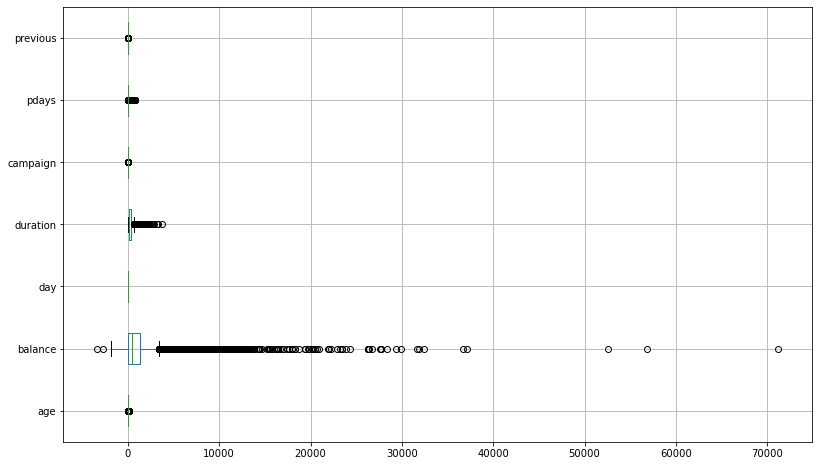

In [104]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
test.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

##### remove outliers : previous column

In [105]:
print("Before remove outliers",test.shape)

Before remove outliers (9767, 16)


In [106]:
Q1 = test["previous"].quantile(0.25)
Q3 = test["previous"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [107]:
test = test[(test["previous"] >= low_limit) &
                        (test["previous"] <= high_limit)
                        ]

In [108]:
print("After remove outliers",test.shape)

After remove outliers (8066, 16)


##### remove outliers : pdays column

In [109]:
print("Before remove outliers",test.shape)

Before remove outliers (8066, 16)


In [110]:
Q1 = test["pdays"].quantile(0.25)
Q3 = test["pdays"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [111]:
test = test[(test["pdays"] >= low_limit) &
                        (test["pdays"] <= high_limit)
                        ]

In [112]:
print("After remove outliers",test.shape)

After remove outliers (8066, 16)


##### remove outliers : campaign column

In [113]:
print("Before remove outliers",test.shape)

Before remove outliers (8066, 16)


In [114]:
Q1 = test["campaign"].quantile(0.25)
Q3 = test["campaign"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [115]:
test = test[(test["campaign"] >= low_limit) &
                        (test["campaign"] <= high_limit)
                        ]

In [116]:
print("After remove outliers",test.shape)

After remove outliers (7429, 16)


##### remove outliers : duration column

In [117]:
print("Before remove outliers",test.shape)

Before remove outliers (7429, 16)


In [118]:
Q1 = test["duration"].quantile(0.25)
Q3 = test["duration"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [119]:
test = test[(test["duration"] >= low_limit) &
                        (test["duration"] <= high_limit)
                        ]

In [120]:
print("After remove outliers",test.shape)

After remove outliers (6924, 16)


##### remove outliers : day column

In [121]:
print("Before remove outliers",test.shape)

Before remove outliers (6924, 16)


In [122]:
Q1 = test["day"].quantile(0.25)
Q3 = test["day"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [123]:
test = test[(test["day"] >= low_limit) &
                        (test["day"] <= high_limit)
                        ]

In [124]:
print("After remove outliers",test.shape)

After remove outliers (6924, 16)


##### remove outliers : balance column

In [125]:
print("Before remove outliers",test.shape)

Before remove outliers (6924, 16)


In [126]:
Q1 = test["balance"].quantile(0.25)
Q3 = test["balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [127]:
test = test[(test["balance"] >= low_limit) &
                        (test["balance"] <= high_limit)
                        ]

In [128]:
print("After remove outliers",test.shape)

After remove outliers (6186, 16)


##### remove outliers : age column

In [129]:
print("Before remove outliers",test.shape)

Before remove outliers (6186, 16)


In [130]:
Q1 = test["age"].quantile(0.25)
Q3 = test["age"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [131]:
test = test[(test["age"] >= low_limit) &
                        (test["age"] <= high_limit)
                        ]

In [132]:
print("After remove outliers",test.shape)

After remove outliers (6141, 16)


##### Now there are no outliers in Data Test

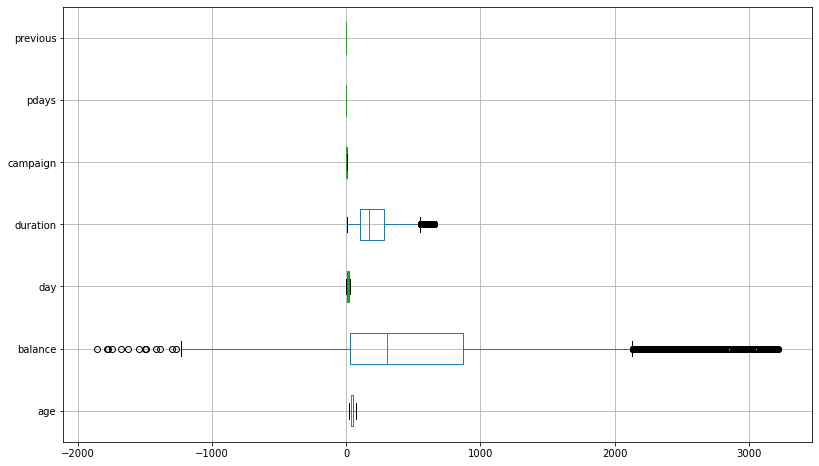

In [133]:
# Outlier Analysis checking again

plt.figure(figsize=(16, 8))

# Create Boxplot
test.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

#### 3. Missing Value Handling

In [134]:
test

age            job   marital  education default  balance housing loan  \
8165    24    blue-collar    single    primary      no      147     yes   no   
21927   32     technician   married  secondary      no       20      no   no   
14416   47     technician   married  secondary      no        0      no   no   
35457   48     management  divorced  secondary      no      122     yes   no   
30863   52     management   married   tertiary      no      749      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
26293   54  self-employed   married    primary      no     2132      no  yes   
2402    23         admin.    single  secondary      no      281     yes   no   
6976    51     technician  divorced  secondary      no        0     yes   no   
7235    51     management   married   tertiary      no        0     yes  yes   
16819   39    blue-collar   married  secondary      no      -66      no  yes   

         contact  day month  duration  campaign  pdays  previous subscribed  
8165     unknown    2   jun       102         2     -1         0         no  
21927   cellular   20   aug       210         2     -1         0         no  
14416  telephone   14   jul        81         2     -1         0         no  
35457  telephone    7   may       325         1     -1         0         no  
30863   cellular    9   feb       342         2     -1         0         no  
...          ...  ...   ...       ...       ...    ...       ...        ...  
26293   cellular   20   nov        91         1     -1         0         no  
2402     unknown   13   may       124         1     -1         0         no  
6976     unknown   28   may       463         2     -1         0         no  
7235     unknown   29   may       410         5     -1         0         no  
16819  telephone   24   jul       626         5     -1         0         no  

[6141 rows x 16 columns]

#### Missing Value Check each rows

In [135]:
test['n_missing'] = test.isnull().sum(axis=1)
test.sort_values('n_missing',ascending=False)

age          job   marital  education default  balance housing loan  \
8165    24  blue-collar    single    primary      no      147     yes   no   
39908   31      student    single   tertiary      no       64      no   no   
21579   32   management   married   tertiary      no      644      no   no   
28748   31     services   married  secondary      no      288      no   no   
3552    25  blue-collar    single  secondary      no        0     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
46336   38  blue-collar  divorced  secondary      no     2998     yes   no   
39743   25   technician   married  secondary      no      517      no   no   
30298   37   technician    single  secondary      no      123      no  yes   
25507   37     services   married  secondary      no      345     yes  yes   
16819   39  blue-collar   married  secondary      no      -66      no  yes   

         contact  day month  duration  campaign  pdays  previous subscribed  \
8165     unknown    2   jun       102         2     -1         0         no   
39908   cellular    2   jun       261         2     -1         0        yes   
21579   cellular   19   aug       100         2     -1         0         no   
28748   cellular   30   jan       164         1     -1         0         no   
3552     unknown   15   may       244         2     -1         0         no   
...          ...  ...   ...       ...       ...    ...       ...        ...   
46336    unknown   11   jun        91         1     -1         0         no   
39743   cellular   28   may       135         3     -1         0         no   
30298   cellular    5   feb       136         1     -1         0         no   
25507   cellular   19   nov       204         1     -1         0         no   
16819  telephone   24   jul       626         5     -1         0         no   

       n_missing  
8165           0  
39908          0  
21579          0  
28748          0  
3552           0  
...          ...  
46336          0  
39743          0  
30298          0  
25507          0  
16819          0  

[6141 rows x 17 columns]

In [136]:
test.drop('n_missing', axis=1, inplace=True)
test

age            job   marital  education default  balance housing loan  \
8165    24    blue-collar    single    primary      no      147     yes   no   
21927   32     technician   married  secondary      no       20      no   no   
14416   47     technician   married  secondary      no        0      no   no   
35457   48     management  divorced  secondary      no      122     yes   no   
30863   52     management   married   tertiary      no      749      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
26293   54  self-employed   married    primary      no     2132      no  yes   
2402    23         admin.    single  secondary      no      281     yes   no   
6976    51     technician  divorced  secondary      no        0     yes   no   
7235    51     management   married   tertiary      no        0     yes  yes   
16819   39    blue-collar   married  secondary      no      -66      no  yes   

         contact  day month  duration  campaign  pdays  previous subscribed  
8165     unknown    2   jun       102         2     -1         0         no  
21927   cellular   20   aug       210         2     -1         0         no  
14416  telephone   14   jul        81         2     -1         0         no  
35457  telephone    7   may       325         1     -1         0         no  
30863   cellular    9   feb       342         2     -1         0         no  
...          ...  ...   ...       ...       ...    ...       ...        ...  
26293   cellular   20   nov        91         1     -1         0         no  
2402     unknown   13   may       124         1     -1         0         no  
6976     unknown   28   may       463         2     -1         0         no  
7235     unknown   29   may       410         5     -1         0         no  
16819  telephone   24   jul       626         5     -1         0         no  

[6141 rows x 16 columns]

#### Missing Value check each columns

In [137]:
test.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
subscribed    0
dtype: int64

In [138]:
test.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
subscribed    0
dtype: int64

In [139]:
count_nan_in_test = test.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_test))

Count of NaN: 0


In [140]:
check_nan_in_test = test.isnull().values.any()
print (check_nan_in_test)

False


In [141]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= age =================


31    309
32    283
34    263
36    258
33    252
35    250
30    240
37    226
39    218
38    213
42    180
46    180
45    177
40    176
29    176
41    167
43    160
47    153
44    148
53    136
49    135
48    132
52    131
51    127
55    126
57    122
28    117
50    117
27    113
56    111
54    106
26    105
59    105
58    103
60     78
25     78
24     48
23     23
22     18
61     13
21      8
62      8
63      7
20      7
65      6
67      6
66      6
64      6
19      5
69      4
68      3
70      2
Name: age, dtype: int64


============= job =================


blue-collar      1426
management       1204
technician       1069
admin.            715
services          554
retired           249
self-employed     216
entrepreneur      196
housemaid         188
unemployed        178
student           110
unknown            36
Name: job, dtype: int64


============= marital =================


married     3781
single      1625
divorced     735
Name: marital, dtype: int64


============= education =================


secondary    3184
tertiary     1731
primary       961
unknown       265
Name: education, dtype: int64


============= default =================


no     6006
yes     135
Name: default, dtype: int64


============= balance =================


 0       589
 1        30
 2        28
 3        24
 4        21
        ... 
 663       1
-296       1
 1526      1
 645       1
-66        1
Name: balance, Length: 2280, dtype: int64


============= housing =================


yes    3427
no     2714
Name: housing, dtype: int64


============= loan =================


no     5049
yes    1092
Name: loan, dtype: int64


============= contact =================


cellular     3505
unknown      2301
telephone     335
Name: contact, dtype: int64


============= day =================


20    343
8     297
7     287
18    275
21    271
19    264
6     260
5     255
28    252
29    251
17    251
14    244
9     239
30    221
13    214
15    204
12    199
4     199
16    198
11    180
27    178
2     155
26    153
23    149
3     138
22    129
25    103
10     73
31     70
24     62
1      27
Name: day, dtype: int64


============= month =================


may    2066
jul    1077
aug     872
jun     819
nov     392
apr     302
feb     275
jan     189
oct      63
mar      43
sep      32
dec      11
Name: month, dtype: int64


============= duration =================


81     35
88     34
124    32
136    31
126    31
       ..
527     1
612     1
552     1
568     1
603     1
Name: duration, Length: 625, dtype: int64


============= campaign =================


1    2414
2    1809
3     899
4     547
5     273
6     199
Name: campaign, dtype: int64


============= pdays =================


-1    6141
Name: pdays, dtype: int64


============= previous =================


0    6141
Name: previous, dtype: int64


============= subscribed =================


no     5796
yes     345
Name: subscribed, dtype: int64

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :

- Job: unknown
- Education: unknown
- Contact: unknown

Because of poutcome column has been dropped.
balance: average yearly balance, if the value is negative because banks charge fees when this happens. And your bank could close your account if it stays negative for too long. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values. Should we drop that column? Or should we impute the missing value?

First, we have to see what's the percentage of missing value in that column. If it contained a lot of missing value (let say >35%), then we can just drop that column. If not, then we can do some imputation.

#### Check percentage of missing value in each column selection

In [142]:
100 * len(test[test['job'].isin(['unknown'])]) / len(test)

0.5862237420615535

In [143]:
100 * len(test[test['education'].isin(['unknown'])]) / len(test)

4.315258101286435

In [144]:
100 * len(test[test['contact'].isin(['unknown'])]) / len(test)

37.469467513434296

for me contact column is important to analyze because of in this dataset, the marketing target way is only using celullar and telephone so we mustn't to drop it since the % missing value near 35%. So, we just drop poutcome column. I hope it's wise choice to imputing another column with unknown value.

#### imputation data for : job, education, contact columns based on data train as reference imputation

###### mode_job : modus job in data train

In [145]:
test['job'] = test['job'].apply(lambda x: mode_job if x in ['unknown'] else x)

In [146]:
test['job'].value_counts()

blue-collar      1462
management       1204
technician       1069
admin.            715
services          554
retired           249
self-employed     216
entrepreneur      196
housemaid         188
unemployed        178
student           110
Name: job, dtype: int64

#### mode_education : modus education in data train

In [147]:
test['education'] = test['education'].apply(lambda x: mode_education if x in ['unknown'] else x)

In [148]:
test['education'].value_counts()

secondary    3449
tertiary     1731
primary       961
Name: education, dtype: int64

#### mode_contact : modus contact in data train

In [149]:
test['contact'] = test['contact'].apply(lambda x: mode_contact if x in ['unknown'] else x)

In [150]:
test['contact'].value_counts()

cellular     5806
telephone     335
Name: contact, dtype: int64

#### check again for each columns

In [151]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= age =================


31    309
32    283
34    263
36    258
33    252
35    250
30    240
37    226
39    218
38    213
42    180
46    180
45    177
40    176
29    176
41    167
43    160
47    153
44    148
53    136
49    135
48    132
52    131
51    127
55    126
57    122
28    117
50    117
27    113
56    111
54    106
26    105
59    105
58    103
60     78
25     78
24     48
23     23
22     18
61     13
21      8
62      8
63      7
20      7
65      6
67      6
66      6
64      6
19      5
69      4
68      3
70      2
Name: age, dtype: int64


============= job =================


blue-collar      1462
management       1204
technician       1069
admin.            715
services          554
retired           249
self-employed     216
entrepreneur      196
housemaid         188
unemployed        178
student           110
Name: job, dtype: int64


============= marital =================


married     3781
single      1625
divorced     735
Name: marital, dtype: int64


============= education =================


secondary    3449
tertiary     1731
primary       961
Name: education, dtype: int64


============= default =================


no     6006
yes     135
Name: default, dtype: int64


============= balance =================


 0       589
 1        30
 2        28
 3        24
 4        21
        ... 
 663       1
-296       1
 1526      1
 645       1
-66        1
Name: balance, Length: 2280, dtype: int64


============= housing =================


yes    3427
no     2714
Name: housing, dtype: int64


============= loan =================


no     5049
yes    1092
Name: loan, dtype: int64


============= contact =================


cellular     5806
telephone     335
Name: contact, dtype: int64


============= day =================


20    343
8     297
7     287
18    275
21    271
19    264
6     260
5     255
28    252
29    251
17    251
14    244
9     239
30    221
13    214
15    204
12    199
4     199
16    198
11    180
27    178
2     155
26    153
23    149
3     138
22    129
25    103
10     73
31     70
24     62
1      27
Name: day, dtype: int64


============= month =================


may    2066
jul    1077
aug     872
jun     819
nov     392
apr     302
feb     275
jan     189
oct      63
mar      43
sep      32
dec      11
Name: month, dtype: int64


============= duration =================


81     35
88     34
124    32
136    31
126    31
       ..
527     1
612     1
552     1
568     1
603     1
Name: duration, Length: 625, dtype: int64


============= campaign =================


1    2414
2    1809
3     899
4     547
5     273
6     199
Name: campaign, dtype: int64


============= pdays =================


-1    6141
Name: pdays, dtype: int64


============= previous =================


0    6141
Name: previous, dtype: int64


============= subscribed =================


no     5796
yes     345
Name: subscribed, dtype: int64

#### Check for test data and train data

In [152]:
test

age            job   marital  education default  balance housing loan  \
8165    24    blue-collar    single    primary      no      147     yes   no   
21927   32     technician   married  secondary      no       20      no   no   
14416   47     technician   married  secondary      no        0      no   no   
35457   48     management  divorced  secondary      no      122     yes   no   
30863   52     management   married   tertiary      no      749      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
26293   54  self-employed   married    primary      no     2132      no  yes   
2402    23         admin.    single  secondary      no      281     yes   no   
6976    51     technician  divorced  secondary      no        0     yes   no   
7235    51     management   married   tertiary      no        0     yes  yes   
16819   39    blue-collar   married  secondary      no      -66      no  yes   

         contact  day month  duration  campaign  pdays  previous subscribed  
8165    cellular    2   jun       102         2     -1         0         no  
21927   cellular   20   aug       210         2     -1         0         no  
14416  telephone   14   jul        81         2     -1         0         no  
35457  telephone    7   may       325         1     -1         0         no  
30863   cellular    9   feb       342         2     -1         0         no  
...          ...  ...   ...       ...       ...    ...       ...        ...  
26293   cellular   20   nov        91         1     -1         0         no  
2402    cellular   13   may       124         1     -1         0         no  
6976    cellular   28   may       463         2     -1         0         no  
7235    cellular   29   may       410         5     -1         0         no  
16819  telephone   24   jul       626         5     -1         0         no  

[6141 rows x 16 columns]

In [153]:
train

age          job   marital  education default  balance housing loan  \
823     33  blue-collar    single    primary      no       95     yes   no   
31304   19      student    single  secondary      no     1803      no   no   
15594   25  blue-collar   married  secondary      no      895      no   no   
14670   45   management   married   tertiary      no        0      no  yes   
26345   32  blue-collar  divorced  secondary      no      658      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
7751    36  blue-collar   married  secondary      no      740     yes   no   
20609   30   management    single   tertiary      no       67      no   no   
7813    36   management    single   tertiary      no     2806     yes   no   
43723   50   technician   married   tertiary      no     1830      no   no   
32511   34   management  divorced   tertiary      no      528     yes   no   

        contact  day month  duration  campaign  pdays  previous subscribed  
823    cellular    7   may       102         1     -1         0         no  
31304  cellular   10   mar        59         1     -1         0         no  
15594  cellular   21   jul       317         3     -1         0         no  
14670  cellular   15   jul       112         4     -1         0         no  
26345  cellular   20   nov       173         2     -1         0         no  
...         ...  ...   ...       ...       ...    ...       ...        ...  
7751   cellular   30   may       171         2     -1         0         no  
20609  cellular   12   aug       578         4     -1         0         no  
7813   cellular   30   may       358         4     -1         0         no  
43723  cellular   14   may       318         3     -1         0         no  
32511  cellular   17   apr       233         2     -1         0         no  

[22822 rows x 16 columns]

#### Split into Xtrain,ytrain,Xtest,ytest

In [154]:

#train dataset
Xtrain = train.iloc[:,:-1] #drop the last column
ytrain = train.iloc[:,-1] #choose the last column

#test dataset
Xtest = test.iloc[:,:-1] #drop the last column
ytest = test.iloc[:,-1] #choose the last column

print('There are {} samples in the training set and {} samples in the test set.'.format(
Xtrain.shape[0] , Xtest.shape[0]))
print()

There are 22822 samples in the training set and 6141 samples in the test set.



In [155]:
Xtrain

age          job   marital  education default  balance housing loan  \
823     33  blue-collar    single    primary      no       95     yes   no   
31304   19      student    single  secondary      no     1803      no   no   
15594   25  blue-collar   married  secondary      no      895      no   no   
14670   45   management   married   tertiary      no        0      no  yes   
26345   32  blue-collar  divorced  secondary      no      658      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
7751    36  blue-collar   married  secondary      no      740     yes   no   
20609   30   management    single   tertiary      no       67      no   no   
7813    36   management    single   tertiary      no     2806     yes   no   
43723   50   technician   married   tertiary      no     1830      no   no   
32511   34   management  divorced   tertiary      no      528     yes   no   

        contact  day month  duration  campaign  pdays  previous  
823    cellular    7   may       102         1     -1         0  
31304  cellular   10   mar        59         1     -1         0  
15594  cellular   21   jul       317         3     -1         0  
14670  cellular   15   jul       112         4     -1         0  
26345  cellular   20   nov       173         2     -1         0  
...         ...  ...   ...       ...       ...    ...       ...  
7751   cellular   30   may       171         2     -1         0  
20609  cellular   12   aug       578         4     -1         0  
7813   cellular   30   may       358         4     -1         0  
43723  cellular   14   may       318         3     -1         0  
32511  cellular   17   apr       233         2     -1         0  

[22822 rows x 15 columns]

In [156]:
ytrain

823      no
31304    no
15594    no
14670    no
26345    no
         ..
7751     no
20609    no
7813     no
43723    no
32511    no
Name: subscribed, Length: 22822, dtype: object

In [157]:
Xtest

age            job   marital  education default  balance housing loan  \
8165    24    blue-collar    single    primary      no      147     yes   no   
21927   32     technician   married  secondary      no       20      no   no   
14416   47     technician   married  secondary      no        0      no   no   
35457   48     management  divorced  secondary      no      122     yes   no   
30863   52     management   married   tertiary      no      749      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
26293   54  self-employed   married    primary      no     2132      no  yes   
2402    23         admin.    single  secondary      no      281     yes   no   
6976    51     technician  divorced  secondary      no        0     yes   no   
7235    51     management   married   tertiary      no        0     yes  yes   
16819   39    blue-collar   married  secondary      no      -66      no  yes   

         contact  day month  duration  campaign  pdays  previous  
8165    cellular    2   jun       102         2     -1         0  
21927   cellular   20   aug       210         2     -1         0  
14416  telephone   14   jul        81         2     -1         0  
35457  telephone    7   may       325         1     -1         0  
30863   cellular    9   feb       342         2     -1         0  
...          ...  ...   ...       ...       ...    ...       ...  
26293   cellular   20   nov        91         1     -1         0  
2402    cellular   13   may       124         1     -1         0  
6976    cellular   28   may       463         2     -1         0  
7235    cellular   29   may       410         5     -1         0  
16819  telephone   24   jul       626         5     -1         0  

[6141 rows x 15 columns]

In [158]:
ytest

8165     no
21927    no
14416    no
35457    no
30863    no
         ..
26293    no
2402     no
6976     no
7235     no
16819    no
Name: subscribed, Length: 6141, dtype: object

#### Chi-Square Test

In [159]:
#Categorical Data
train_house = pd.crosstab(Xtrain.housing,ytrain)
train_loan = pd.crosstab(Xtrain.loan,ytrain)
train_contact = pd.crosstab(Xtrain.contact,ytrain)
train_month = pd.crosstab(Xtrain.month,ytrain)
train_job = pd.crosstab(Xtrain.job,ytrain)
train_default = pd.crosstab(Xtrain.default,ytrain)
train_marital = pd.crosstab(Xtrain.marital,ytrain)
train_edcucation = pd.crosstab(Xtrain.education,ytrain)

#Numerical Data
train_age = pd.crosstab(Xtrain.age,ytrain)
train_balance = pd.crosstab(Xtrain.balance,ytrain)
train_duration = pd.crosstab(Xtrain.duration,ytrain)
train_day = pd.crosstab(Xtrain.day,ytrain)
train_campaign = pd.crosstab(Xtrain.campaign,ytrain)
train_pdays = pd.crosstab(Xtrain.pdays,ytrain)
train_previous = pd.crosstab(Xtrain.previous,ytrain)


#returns four values, 𝜒2 value, p-value, degree of freedom and expected values.

data_column = [train_age,train_balance,train_duration,train_day,train_campaign,train_pdays,train_previous,train_job,train_marital,train_edcucation,train_default,train_contact,train_house,train_loan,train_month]

print("P values of every column")
n=1
for x in data_column:
  
  chi, pval, dof, exp = chi2_contingency(x)
  significance = 0.05
  print(n,'. -------------------------------',x.index.name,'---------------------------------')

  print('p-value=%.6f, significance=%.2f\n' % (pval, significance))
  if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.""" % (significance))
  else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
  They are independent.""" % (significance))
    
  #print(x.index.name," = " ,chi2_contingency(x)[1]) # print p values

  print('  --------------------------------------------------------------------------------\n\n')
  n+=1

P values of every column
1 . ------------------------------- age ---------------------------------
p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.
  --------------------------------------------------------------------------------


2 . ------------------------------- balance ---------------------------------
p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.
  --------------------------------------------------------------------------------


3 . ------------------------------- duration ---------------------------------
p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
  They are not independent.
  --------------------------------------------------------------------------------


4 . ------------------------------- day -----------------------

The Purpose of Chi-Square Test is carried out to investigate the dependency between the both categorical x and y.
Based on the results below, the attribute job, marital, education, defualt, housing, loan, contact, month, poutcome, age, balance, duration, day, campaign, pdays, and previous are not independent to subscribed, we reject the null hypotheses and accept H1.

#### 4. Encoding Preparation : Data Train and Data Test

The sklearn LabelEncoder function is utilized to encode the categorical variables such as job, marital, education, contact, poutcome, default, housing, loan, subscribed and month.


In [160]:
def column_encoding(df_x , df_y):

  df = pd.concat([df_x,df_y],axis=1)
  
  label_encoder = preprocessing.LabelEncoder()

  nominal_cols = ['job', 'marital','education' , 'contact']
  for name in nominal_cols:
    df[name] = label_encoder.fit_transform(df[name])
    df[name].value_counts()

  #encoding 'default' , 'housing', 'loan' attributes 
  # 1 is yes , 0 is no
  mapping_dictionary = {"default" :{"yes" : 1 , "no" : 0},
                      "housing"  :{"yes" : 1 , "no" : 0},
                      "loan" :{"yes" : 1 , "no" : 0} ,
                      "subscribed" : {"yes" : 1 , "no" : 0}}

  df = df.replace(mapping_dictionary)

  #month
  replace_dictionary = { "month" : {"jan" : 1 , 
                                  "feb" : 2,
                                  "mar" : 3,
                                  "apr" : 4,
                                  "may" : 5,
                                  "jun" : 6,
                                  "jul" : 7,
                                  "aug" : 8,
                                  "sep" : 9,
                                  "oct" : 10,
                                  "nov" : 11,
                                  "dec" : 12}}

  df.replace(replace_dictionary , inplace=True)

  df_y = df.subscribed
  df_x = df.drop('subscribed', axis=1)
  return df_x , df_y

#### Encode separately for data train and data test

In [161]:
Xtrain , ytrain = column_encoding(Xtrain , ytrain)
Xtest , ytest = column_encoding(Xtest , ytest)

##### Let's check it
After performing label encoding operation for both train and test datasets, the categorical values are converted to numerical values.

In [162]:
Xtrain.head()

age  job  marital  education  default  balance  housing  loan  contact  \
823     33    1        2          0        0       95        1     0        0   
31304   19    8        2          1        0     1803        0     0        0   
15594   25    1        1          1        0      895        0     0        0   
14670   45    4        1          2        0        0        0     1        0   
26345   32    1        0          1        0      658        0     0        0   

       day  month  duration  campaign  pdays  previous  
823      7      5       102         1     -1         0  
31304   10      3        59         1     -1         0  
15594   21      7       317         3     -1         0  
14670   15      7       112         4     -1         0  
26345   20     11       173         2     -1         0

In [163]:
Xtest.head()

age  job  marital  education  default  balance  housing  loan  contact  \
8165    24    1        2          0        0      147        1     0        0   
21927   32    9        1          1        0       20        0     0        0   
14416   47    9        1          1        0        0        0     0        1   
35457   48    4        0          1        0      122        1     0        1   
30863   52    4        1          2        0      749        0     1        0   

       day  month  duration  campaign  pdays  previous  
8165     2      6       102         2     -1         0  
21927   20      8       210         2     -1         0  
14416   14      7        81         2     -1         0  
35457    7      5       325         1     -1         0  
30863    9      2       342         2     -1         0

In [164]:
ytrain

823      0
31304    0
15594    0
14670    0
26345    0
        ..
7751     0
20609    0
7813     0
43723    0
32511    0
Name: subscribed, Length: 22822, dtype: int64

In [165]:
ytest

8165     0
21927    0
14416    0
35457    0
30863    0
        ..
26293    0
2402     0
6976     0
7235     0
16819    0
Name: subscribed, Length: 6141, dtype: int64

In [166]:
ytrain.value_counts()

0    21514
1     1308
Name: subscribed, dtype: int64

In [167]:
ytest.value_counts()

0    5796
1     345
Name: subscribed, dtype: int64

#### Split Xtrain and Xtest into different categories : numerical and categorical
The code below is is used to split the Xtrain into 2 different categories which one consists of categorical data while the other consists of numerical data.

In [168]:
categorical_var_train = Xtrain[['contact','education','default','housing','loan','job','marital',
                         'month']]

numerical_var_train = Xtrain.drop(['contact','education','default','housing','loan','job','marital',
                         'month'],axis=1)    

categorical_var_test = Xtest[['contact','education','default','housing','loan','job','marital',
                         'month']]

numerical_var_test = Xtest.drop(['contact','education','default','housing','loan','job','marital',
                         'month'],axis=1)

#### Standar Scaller / Feature Scalling
Since there are numerical data (continuous) in the table, StandardScaler was used to scales each input variable separately by subtracting the mean and dividing by the standard deviation in order to have a distribution of mean of zero and a standard deviation of one.

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_Xtrain = scaler.fit_transform(numerical_var_train)
scaled_Xtest = scaler.transform(numerical_var_test)

In [170]:
#Scalling Xtrain
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index() 
categorical_var_train =  categorical_var_train.reset_index() 

#Scalling Xtest
scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index() 
categorical_var_test = categorical_var_test.reset_index() 

In [171]:
#Merging Xtrain
Xtrain = pd.concat([scaled_Xtrain,categorical_var_train],axis=1)
Xtrain = Xtrain.drop(['index','index'],axis=1)   

#Merging Xtest
Xtest = pd.concat([scaled_Xtest,categorical_var_test],axis=1)
Xtest = Xtest.drop(['index','index'],axis=1)   

In [172]:
#Check Xtrain
Xtrain.head(10)

0         1         2         3         4    5    6  contact  \
0 -0.740194 -0.616839 -1.048754 -0.738912 -0.882747  0.0  0.0        0   
1 -2.146046  1.503115 -0.690026 -1.046542 -0.882747  0.0  0.0        0   
2 -1.543538  0.376113  0.625308  0.799238  0.603827  0.0  0.0        0   
3  0.464821 -0.734752 -0.092147 -0.667370  1.347115  0.0  0.0        0   
4 -0.840612  0.081951  0.505732 -0.230965 -0.139460  0.0  0.0        0   
5  0.966911 -0.734752 -0.809602 -0.760375 -0.139460  0.0  0.0        0   
6  0.063150  0.774536  0.625308 -1.089468  0.603827  0.0  0.0        0   
7 -0.037268  3.151416  0.984036  1.400190 -0.882747  0.0  0.0        0   
8  1.770255  2.415390  1.821067  0.727696  2.833689  0.0  0.0        0   
9  0.063150 -1.104627 -1.287906  1.371573 -0.882747  0.0  0.0        0   

   education  default  housing  loan  job  marital  month  
0          0        0        1     0    1        2      5  
1          1        0        0     0    8        2      3  
2          1        0        0     0    1        1      7  
3          2        0        0     1    4        1      7  
4          1        0        0     0    1        0     11  
5          1        0        0     0    4        1      7  
6          2        0        1     0    4        2      5  
7          1        0        1     0    1        1      7  
8          0        0        1     0    5        0      7  
9          2        0        1     0    0        0      5

In [173]:
#Check Xtest
Xtest.head(10)

0         1         2         3         4    5    6  contact  \
0 -1.643956 -0.552297 -1.646633 -0.738912 -0.139460  0.0  0.0        0   
1 -0.840612 -0.709928  0.505732  0.033740 -0.139460  0.0  0.0        0   
2  0.665657 -0.734752 -0.211723 -0.889150 -0.139460  0.0  0.0        1   
3  0.766075 -0.583327 -1.048754  0.856472 -0.882747  0.0  0.0        1   
4  1.167747  0.194900 -0.809602  0.978093 -0.139460  0.0  0.0        0   
5 -1.242284 -0.678899  0.027429  0.999555 -0.882747  0.0  0.0        0   
6  1.870673  1.192817  0.266581 -0.903459 -0.139460  0.0  0.0        0   
7 -0.840612 -0.373566  1.342763 -0.610137  2.833689  0.0  0.0        0   
8 -0.137686 -0.734752 -1.168330  0.405758 -0.139460  0.0  0.0        0   
9  1.268165  1.542833  0.625308 -0.152269 -0.139460  0.0  0.0        0   

   education  default  housing  loan  job  marital  month  
0          0        0        1     0    1        2      6  
1          1        0        0     0    9        1      8  
2          1        0        0     0    9        1      7  
3          1        0        1     0    4        0      5  
4          2        0        0     1    4        1      2  
5          1        0        1     0    7        2      5  
6          2        0        0     1    2        1     11  
7          1        0        1     1    1        0      6  
8          0        0        1     0    1        1      5  
9          1        0        1     0    9        1     11

### D. Modelling

#### 1. Unsupervised Learning : PCA

In [174]:
#PCA
def cumulative_variance_pca(model, X):
    
    model.fit(X)
    
    # Calculate cumulative explained variance across all PCs
    cum_exp_var = []
    var_exp = 0
    for i in pca.explained_variance_ratio_:
        var_exp += i
        cum_exp_var.append(var_exp)

    # Plot cumulative explained variance for all PCs
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(range(1,4), cum_exp_var)
    ax.set_xlabel('# Principal Components')
    ax.set_ylabel('% Cumulative Variance Explained')
    return(model)

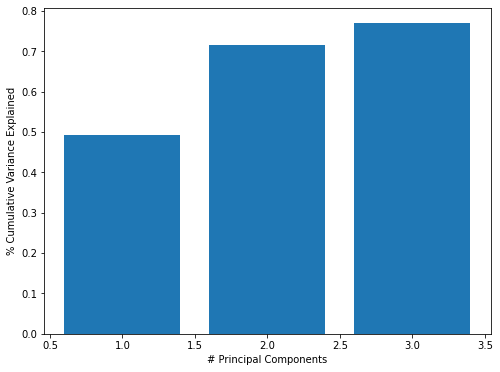

In [175]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# Setup the PCA with PC = 3
pca = PCA(n_components=3)

# Train the model
pca_trained = cumulative_variance_pca(pca,Xtrain)

In [176]:
# Create dataframe consist of PC and Y
X_pca = pca_trained.transform(Xtrain)
# Combine everything
df_PCA = pd.DataFrame(X_pca,columns=["PC1","PC2","PC3"])
df_PCA["subscribed"] = ytrain
df_PCA.tail()

PC1       PC2       PC3  subscribed
22817 -3.308359 -0.874095  0.630128         0.0
22818 -0.080381  1.796774 -1.540835         NaN
22819 -0.259435 -0.971939  0.815511         0.0
22820  4.695387 -1.252719  0.617694         0.0
22821 -0.361213 -2.106864 -0.116003         0.0

In [177]:
#PCA Visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


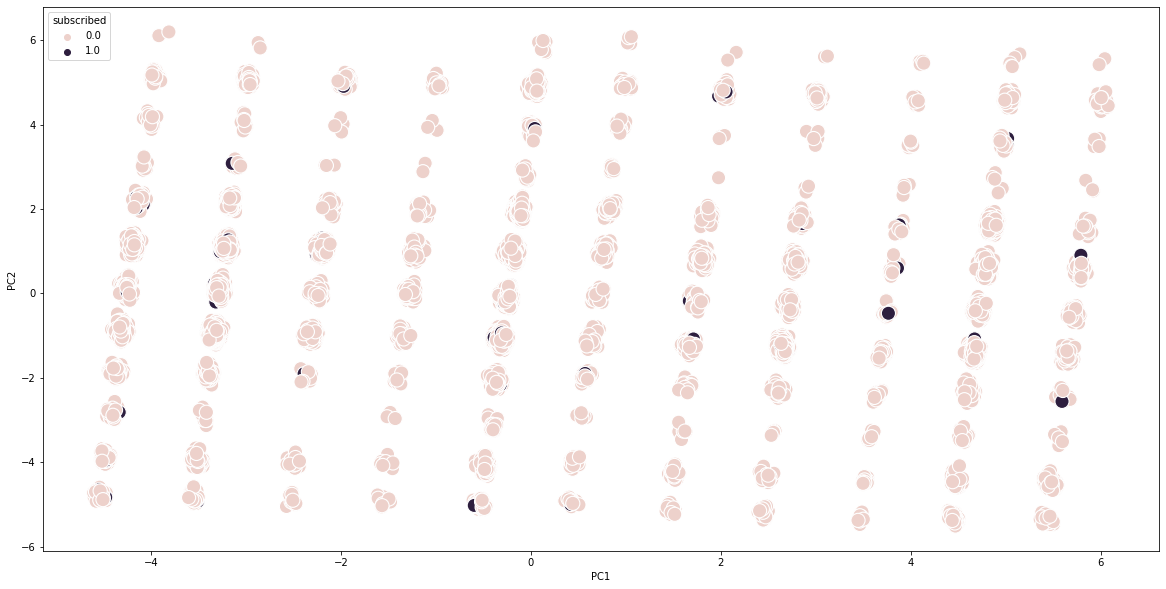

In [178]:
# 2 Dimensional PCA Plot
plt.figure(figsize=(20, 10))
sns.scatterplot(df_PCA["PC1"], df_PCA["PC2"], hue=df_PCA["subscribed"], s=200)
plt.show()

In [179]:
# 3D Plot Visualization (PC 1, PC 2, and PC 3)
import plotly.express as px

fig = px.scatter_3d(df_PCA, x='PC1', y='PC2', z='PC3',color='subscribed')
fig.show()

#### 2. Supervised Learning Using Classification for modelling
1. Logistic Regression
2. K-Nearest Neighbours (KNN)
3. Naive Bayes
4. Support Vector Machine (SVM)

#### 1. Logistic Regression
For Logistic Regression, a logistic regression classifier is implemented. Hyperparameters are tuned using GridSearchCV and model is then fit to training data.

In [180]:
# Instantiate classifier
logistic_regression = LogisticRegression()

# Set up hyperparameter grid for tuning
logistic_regression_param_grid = {'C' : [0.0001, 0.001, 0.01, 0.05, 0.1] }

# Tune hyperparameters
logistic_regression_model = GridSearchCV(logistic_regression, param_grid = logistic_regression_param_grid, cv = 5)

# Fit model to training data
logistic_regression_model.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.05, 0.1]})

Predict the test set results and calculate the accuracy.

In [181]:
# Predict test data on logistic regression
print(f"Test Accuracy : {logistic_regression_model.score(Xtest, ytest)*100} %" )
print(f"Train Accuracy : {logistic_regression_model.score(Xtrain, ytrain)*100} %" )

# Obtain model performance metrics
lr_pred_prob = logistic_regression_model.predict_proba(Xtest)[:,1]
lr_auroc = roc_auc_score(ytest, lr_pred_prob) 

Test Accuracy : 94.33317049340498 %
Train Accuracy : 94.28621505564806 %


In [225]:
# get importance
#from sklearn.datasets import make_classification
#from sklearn.linear_model import LogisticRegression
#importance = logistic_regression.coef_[0]
# summarize feature importance
#for i,v in enumerate(importance):
 #   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

# The positive scores indicate a feature that predicts class (1) yes subscribed, whereas the negative scores indicate a feature that predicts class 0 (no subscribed)

#### 2. K-Nearest Neighbours (KNN)
KNN is an algorithm which it is non-parametric and lazy (instance based) because it doesn't have a specialized training phase. In this section, the grid search algorithm was used to find the best parameters for the k values in order to have the best accuracy. In this case, k value of 14 provides the highest accuracy score.

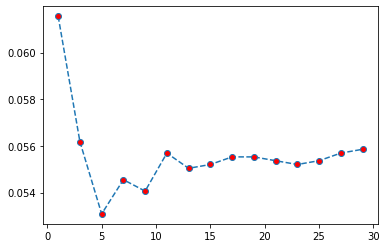

In [182]:
# finding the K value
error = []

for i in range(1,31,2):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    preds = knn.predict(Xtest)
    error.append(np.mean(preds!=ytest))

plt.plot(range(1,31,2), error, linestyle = 'dashed', marker ='o', mfc= 'red')

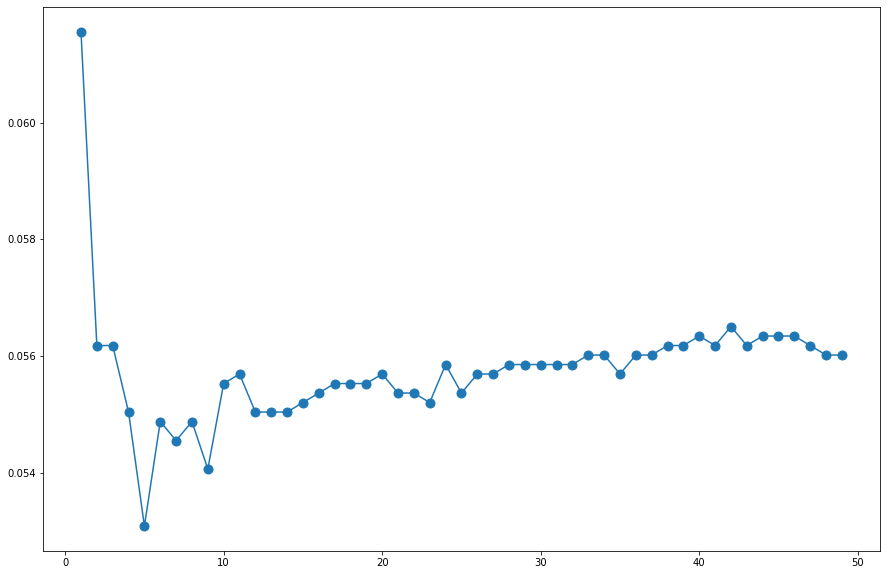

In [183]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred = knn.predict(Xtest)
    error_rate.append(np.mean(pred != ytest))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [184]:
#finding K value using sqrt(n)
#import math
#math.sqrt(len(ytest))

In [185]:
#Fit the training sets to the model.
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski')
knn.fit(Xtrain, ytrain)


KNeighborsClassifier()

In [186]:
#knn_model = knn.predict(Xtest) 

In [187]:
#print(f"Accuracy : {accuracy_score(ytest, knn_model)*100} %" )

##### Predicting the test results and train result

In [188]:
knn_model = knn.predict(Xtest)
knn_modeltrain = knn.predict(Xtrain)
#knn.score(scaled_Xtest, ytest)
#accuracy_score(ytest, knn_model)
print(f"Test Accuracy : {accuracy_score(ytest, knn_model)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, knn_modeltrain)*100} %" )

Test Accuracy : 94.69141833577594 %
Train Accuracy : 95.31154149504863 %


In [230]:
# perform permutation importance
results = permutation_importance(knn, Xtest, ytest, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00173
Feature: 1, Score: 0.00296
Feature: 2, Score: 0.00863
Feature: 3, Score: 0.00726
Feature: 4, Score: 0.00166
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00016
Feature: 8, Score: 0.00078
Feature: 9, Score: -0.00003
Feature: 10, Score: 0.00195
Feature: 11, Score: 0.00016
Feature: 12, Score: 0.00231
Feature: 13, Score: 0.00228
Feature: 14, Score: 0.01003


#### 3. Naive Bayes
Naive Bayes is a simple "probabilistic classifiers" which based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (X) and it is useful for very large dataset. In this section, GaussionNB was imported from sklearn and Xtrain, ytrain were bring fitted into the model in order to do prediction.

In [189]:
from sklearn.naive_bayes import GaussianNB       # 1. choose model class
naive_model = GaussianNB()                     # 2. instantiate model

Fit the training sets to the model.

In [190]:
naive_model.fit(Xtrain, ytrain)                  # 3. fit model to data

GaussianNB()

##### Predict testing test and testing train

In [191]:
y_naive_model_model = naive_model.predict(Xtest)
y_naive_model_model_train = naive_model.predict(Xtrain)

In [192]:
from sklearn.metrics import accuracy_score
#accuracy_score(ytest, y_naive_model_model)
print(f"Test Accuracy : {accuracy_score(ytest, y_naive_model_model)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, y_naive_model_model_train)*100} %" )

Test Accuracy : 91.38576779026218 %
Train Accuracy : 92.11287354307247 %


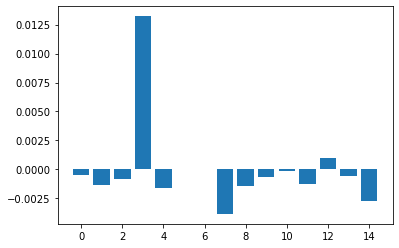

Feature: 0, Score: -0.001
Feature: 1, Score: -0.001
Feature: 2, Score: -0.001
Feature: 3, Score: 0.013
Feature: 4, Score: -0.002
Feature: 5, Score: 0.000
Feature: 6, Score: 0.000
Feature: 7, Score: -0.004
Feature: 8, Score: -0.001
Feature: 9, Score: -0.001
Feature: 10, Score: -0.000
Feature: 11, Score: -0.001
Feature: 12, Score: 0.001
Feature: 13, Score: -0.001
Feature: 14, Score: -0.003


In [226]:
# Feature importance
from sklearn.inspection import permutation_importance
fi_nb = permutation_importance(naive_model, Xtest, ytest)

# Plotting feature importance
plt.bar([x for x in range(len(fi_nb.importances_mean))], fi_nb.importances_mean)
plt.show()

# Summarizing feature importance
for i,v in enumerate(fi_nb.importances_mean):
    print('Feature: %0d, Score: %.3f' % (i,v))
    # The positive scores indicate a feature that predicts class 1 (yes subscribed), whereas the negative scores indicate a feature that predicts class 0 (no subscribed)

#### 4. Support Vector Machine (SVM)

A linear SVM was chosen by using the SVC classifier to make prediction on Xtest dataset by fitting the Xtrain and ytrain datasets into the SVM model. Accuracy was calculated and displyed by using score syntax.


In [193]:
# Import necessary library
from sklearn.svm import SVC

# Create a linear SVM classifier
svm_model = SVC(kernel='linear', probability=True)

# Train classfier
svm_model.fit(Xtrain, ytrain)

# Take the model that was trained on the Xtrain data and apply it to the Xtest
y_pred_svm = svm_model.predict(Xtest)

# Calculation of accuracy Data Test
svmScore = svm_model.score(Xtest, ytest)
svmScoreTrain = svm_model.score(Xtrain,ytrain)

# Calculation of confusion matrix
svmMatrix = confusion_matrix(ytest, y_pred_svm)

# Print output
print(f"Test Accuracy : {svmScore*100} %")
print(f"Train Accuracy : {svmScoreTrain*100} %")

Test Accuracy : 94.3820224719101 %
Train Accuracy : 94.26868810796599 %


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning:

Features [5 6] are constant.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning:

invalid value encountered in true_divide



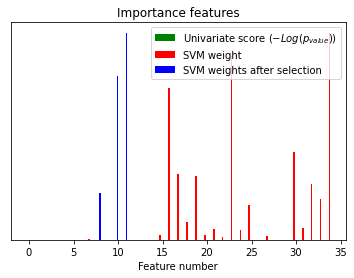

In [243]:
# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(test), 20))

# Add the noisy data to the informative features
X = np.hstack((Xtest, E))
y = ytest

###############################################################################
plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

###############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

###############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Importance features")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [244]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.svm import LinearSVC
#import matplotlib.pyplot as plt
#def plot_coefficients(classifier, feature_names, top_features=20):
 #   coef = classifier.coef_.ravel()
  #  top_positive_coefficients = np.argsort(coef)[-top_features:]
   # top_negative_coefficients = np.argsort(coef)[:top_features]
   # top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
   # plt.figure(figsize=(15, 5))
    #colors = [‘red’ 
      #        if c < 0 
     #             else ‘blue’
       #       for c in coef[top_coefficients]]
    #plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    #feature_names = np.array(feature_names)
    #plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha=’right’)
    #plt.show()cv = CountVectorizer()
    #cv.fit(data)
    #print len(cv.vocabulary_)
    #print cv.get_feature_names()X_train = cv.transform(data)

#svm = LinearSVC()
#svm.fit(Xtrain, target)plot_coefficients(svm, cv.get_feature_names())

### E. Evaluation Model
The evaluation mathod used involving confusion metrix, precision-recall curve and also learning curve.
1. Learning Curve
2. Model Evaluation
3. Precision Recall Curve

#### 1. Learning Curve

#### Function Learning Curve

In [194]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

##### Learning Curves : Logistic Regression

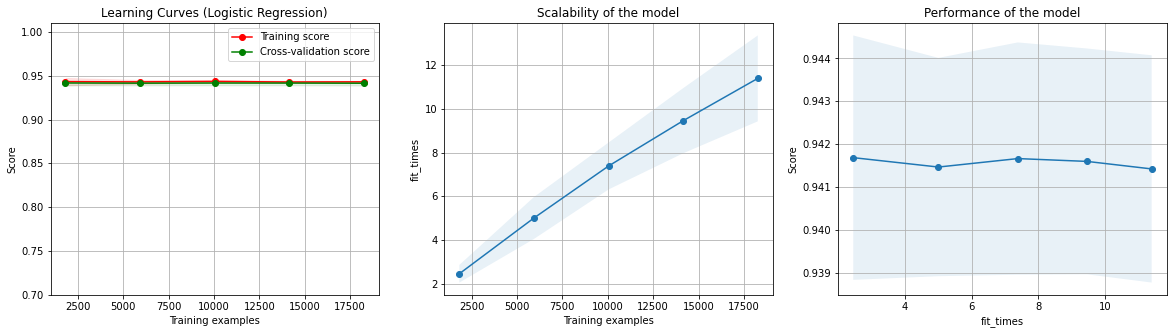

In [195]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state = 30)
plot_learning_curve(logistic_regression_model, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

##### Learning Curves : KNN

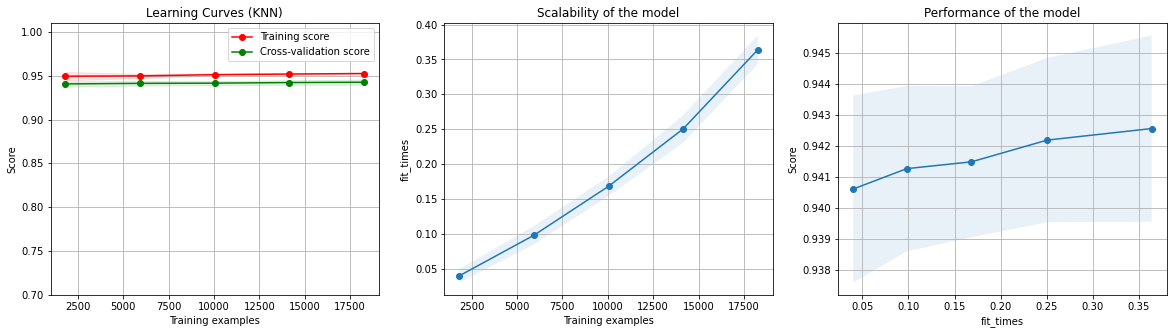

In [196]:
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier()
plot_learning_curve(knn, title, Xtrain, ytrain,ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

##### Learning Curves : Naive Bayes

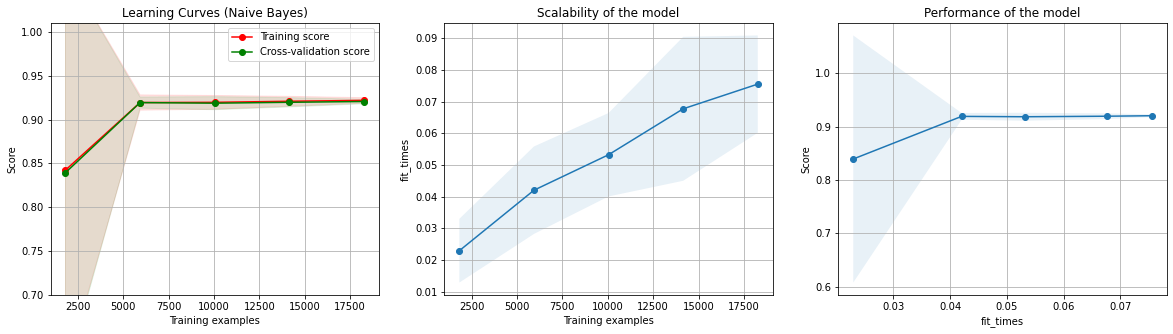

In [197]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(naive_model, title, Xtrain, ytrain,ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

##### Learning Curves : SVM

In [198]:
title = "Learning Curves (Linear SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(svm_model, title, Xtrain, ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

#### 2. Model Evaluation

#### Model Evaluation Function

In [199]:
def res(y_test_valid,y_train_valid):
    cm_log = confusion_matrix(ytest,y_test_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(ytest,y_test_valid))
    print("======================Data Train Result Evaluation========================")
    print('train_accuracy:',accuracy_score(ytrain,y_train_valid))
    print('F1 score:', f1_score(ytrain,y_train_valid))
    print('Recall:', recall_score(ytrain,y_train_valid))
    print ('Precision:', precision_score(ytrain,y_train_valid))
    
    print("======================Data Test Result Evaluation========================")
    print('test_accuracy:',accuracy_score(ytest,y_test_valid))
    print('F1 score:', f1_score(ytest, y_test_valid))
    print('Recall:', recall_score(ytest,y_test_valid))
    print ('Precision:', precision_score(ytest,y_test_valid))
    #print ('Precision:', precision_score(ytest, model,pos_label=1))
    #print ('Accuracy:', accuracy_score(ytest, model))
    #print ('F1 score:', f1_score(ytest, model,pos_label=1))
    #print ('Recall:', recall_score(ytest, model,pos_label=1))
    #print ('\n clasification report:\n', classification_report(ytest,model,target_names=target_names))

In [200]:
def model_evaluation(model,name):
    
    confusion_matrix = pd.crosstab(ytest, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    target_names = ['No' , 'Yes']
    print ('Precision:', precision_score(ytest, model,pos_label=1))
    print ('Accuracy:', accuracy_score(ytest, model))
    print ('F1 score:', f1_score(ytest, model,pos_label=1))
    print ('Recall:', recall_score(ytest, model,pos_label=1))
    print ('\n clasification report:\n', classification_report(ytest,model,target_names=target_names))

#### Logistic Regression

In [201]:
#log_model= LogisticRegression()
#log_model.fit(Xtrain,ytrain)
#y_pred_log = log_model.predict(Xtest)
#y_pred_train = log_model.predict(Xtrain)
#res(y_pred_log,y_pred_train)

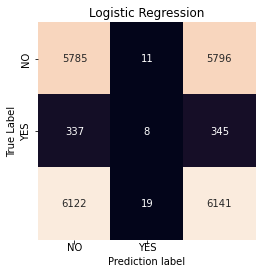

Precision: 0.42105263157894735
Accuracy: 0.9433317049340498
F1 score: 0.04395604395604395
Recall: 0.02318840579710145

 clasification report:
               precision    recall  f1-score   support

          No       0.94      1.00      0.97      5796
         Yes       0.42      0.02      0.04       345

    accuracy                           0.94      6141
   macro avg       0.68      0.51      0.51      6141
weighted avg       0.92      0.94      0.92      6141



In [202]:
lr_y_pred = logistic_regression_model.predict(Xtest)
model_evaluation(lr_y_pred,"Logistic Regression")

In [203]:
plot_roc_curve(logistic_regression_model,Xtest,ytest)
plt.show()

#### KNN

In [204]:
#knn = KNeighborsClassifier(n_neighbors=77)
#knn_model.fit(Xtrain,ytrain)
#y_pred_knn = knn_model.predict(Xtest)
#y_pred_knn_train = knn_model.predict(Xtrain)

#res(y_pred_knn,y_pred_knn_train)

In [205]:
model_evaluation(knn_model,"KNN")

Precision: 0.6376811594202898
Accuracy: 0.9469141833577593
F1 score: 0.21256038647342995
Recall: 0.12753623188405797

 clasification report:
               precision    recall  f1-score   support

          No       0.95      1.00      0.97      5796
         Yes       0.64      0.13      0.21       345

    accuracy                           0.95      6141
   macro avg       0.79      0.56      0.59      6141
weighted avg       0.93      0.95      0.93      6141



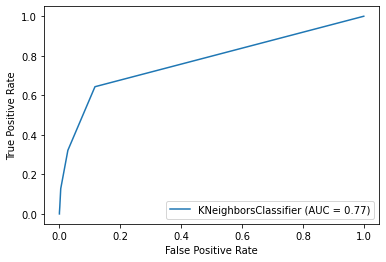

In [206]:
plot_roc_curve(knn,Xtest,ytest)
plt.show()

#### SVM

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      5796
           1       0.17      0.81      0.29       345

    accuracy                           0.77      6141
   macro avg       0.58      0.79      0.58      6141
weighted avg       0.94      0.77      0.83      6141

======================Data Train Result Evaluation========================
train_accuracy: 0.7802997108053632
F1 score: 0.3108851017042331
Recall: 0.8646788990825688
Precision: 0.1895107238605898
======================Data Test Result Evaluation========================
test_accuracy: 0.7741410193779514
F1 score: 0.28615542974781266
Recall: 0.8057971014492754
Precision: 0.1739674593241552


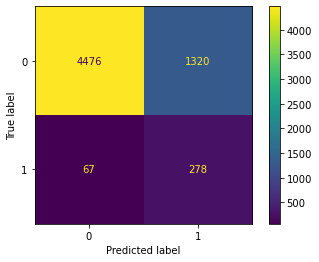

In [207]:
#use penalized learning algorithms that increase the cost of classification mistakes on the minority class.
svm_model = SVC(class_weight='balanced', probability=True)
svm_model.fit(Xtrain,ytrain)
y_pred_svm = svm_model.predict(Xtest)
y_pred_svm_train = svm_model.predict(Xtrain)
res(y_pred_svm,y_pred_svm_train)

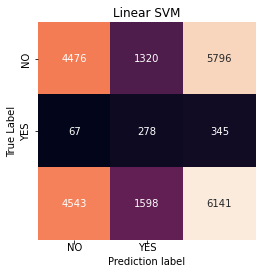

Precision: 0.1739674593241552
Accuracy: 0.7741410193779514
F1 score: 0.28615542974781266
Recall: 0.8057971014492754

 clasification report:
               precision    recall  f1-score   support

          No       0.99      0.77      0.87      5796
         Yes       0.17      0.81      0.29       345

    accuracy                           0.77      6141
   macro avg       0.58      0.79      0.58      6141
weighted avg       0.94      0.77      0.83      6141



In [208]:
model_evaluation(y_pred_svm,"Linear SVM")

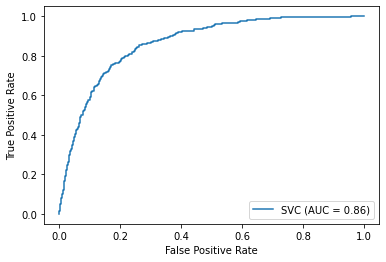

In [209]:
plot_roc_curve(svm_model,Xtest,ytest)
plt.show()

#### Naive Bayes

In [210]:
model_evaluation(y_naive_model_model,"Naive Bayes")

Precision: 0.21069182389937108
Accuracy: 0.9138576779026217
F1 score: 0.20211161387631976
Recall: 0.19420289855072465

 clasification report:
               precision    recall  f1-score   support

          No       0.95      0.96      0.95      5796
         Yes       0.21      0.19      0.20       345

    accuracy                           0.91      6141
   macro avg       0.58      0.58      0.58      6141
weighted avg       0.91      0.91      0.91      6141



In [211]:
plot_roc_curve(naive_model,Xtest,ytest)
plt.show()

## Machine Learning Project End to End (feb 2022)
1. Load Dataset
2. Exploratory Data Analysist
3. Statistical inferential, descriptive, A/B Testing
4. Split into data train & data test (80:20)
5. Data preparation for each data test and data train:
        A. Drop Duplicated Data
        B. Outliers Analysis
        C. Missing Value Handling
6. Feature Scalling -> normalisasi pakai MinMaxScaler(), standardisasi pakai StandarScaler()
            A. Spliting for numerical and categorical Data for each data test & data train
            B. scaled_Xtrain = scaler.fit_transform(numerical_var_train)
            C. scaled_Xtest = scaler.transform(numerical_var_test)
            D. Untuk data numerical, dilakukan standardisasi dan normalisasi.
            E. Untuk data kategorikal tidak perlu dilakukan standardisasi dan normalisasi.
            F. Untuk Data target (y) dilakukan standarscaler dan fit transform
7. Encoding Preparation for data test & data train (column_encoding () ) -> mengubah data kategorikal menjadi numerical
         1. Ordinal data (Nilai matkul, level pendidikan, dsb) diubah menjadi angka (1,2,3,4,..) menggunakan label encoder
             A. Ex : df_dataset['education'] = label_encoder.fit_transform(df_dataset['education'])
         2. Gender, married -> change to (1,0)
             B. Ex : df_dataset["married"] = label_encoder.fit_transform(df_dataset["married"])
             C. Ex : df_dataset['loan_status'] = df_dataset['loan_status'].apply(lambda x: 1 if x=='APPROVE' else 0)
         3. kind of property (house, apartment, dsb) -> get_dummies
             D. Ex : Property_Type = pd.get_dummies(df_dataset["property_type"], prefix="type")
8. Modelling & features important each model
9. Evaluation Model : 
        1. Learning Curve
        2. Model Evaluation
        3. Precision Recall Curve